<a href="https://colab.research.google.com/github/Kennenzz/predict-employee-attrition/blob/main/Train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**XÂY DỰNG MÔ HÌNH DỰ ĐOÁN NGUY CƠ NGHỈ VIỆC CỦA NHÂN VIÊN**
---

**#Import các thư viện sẽ sử dụng trong đồ án bao gồm:**
*   **Pandas**
*   **Numpy**
*   **Matplotlib**
*   **Seaborn**
*   **Matplotlib**
*   **Imblearn**
*   **Sklearn**
*   **LightGBM**
*   **XGBoost**
*   **Pytorch Tabnet**

In [1]:
import pandas as pd
import joblib
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import tensorflow as tf
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from pytorch_tabnet.tab_model import TabNetClassifier
import lightgbm as lgb
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

---
**Đọc file dataset**

In [2]:
try:
    df = pd.read_csv("Dataset.csv")
    display(df.head())
except FileNotFoundError:
    print("Lỗi: Không tìm thấy file dataset trong dữ liệu folder")
except Exception as e:
    print(f"Có lỗi xảy ra: {e}")

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


---
**Mô tả tổng quan về dataset**

In [3]:
display(df.info())
display(df.describe())
display(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

None

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


(1470, 35)

**Tổng quan: Dataset thông tin của nhân viên gồm có 1470 mẫu và 35 cột (thuộc tinh)**


---
# Phân loại các biến trong dataset

In [4]:
numerical_cols = df.select_dtypes(include=np.number).columns
categorical_cols = df.select_dtypes(include='object').columns

print("Biến số:")
display(numerical_cols)

print("\nBiến phân loại:")
display(categorical_cols)

Biến số:


Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


Biến phân loại:


Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

---
**Tiền xử lý dữ liệu**

In [5]:
# Xử lý chuẩn hóa dữ liệu
for col in numerical_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Chuyển đổi sang kiểu số, lỗi sẽ thành NaN
    if df[col].isnull().any():
        print(f"Cảnh báo: Cột '{col}' có giá trị không thể chuyển đổi sang số.")
    print(f"Cột '{col}' đã được chuyển đổi sang kiểu số.")


for col in categorical_cols:
    unique_values = df[col].unique()
    print(f"Giá trị duy nhất trong cột '{col}': {unique_values}")
    df[col] = df[col].str.strip().str.lower()   # Loại bỏ khoảng trắng và chuyển về chữ thường  
    unique_values_after = df[col].unique()
    print(f"Giá trị duy nhất trong cột '{col}' sau khi xử lý: {unique_values_after}")

Cột 'Age' đã được chuyển đổi sang kiểu số.
Cột 'DailyRate' đã được chuyển đổi sang kiểu số.
Cột 'DistanceFromHome' đã được chuyển đổi sang kiểu số.
Cột 'Education' đã được chuyển đổi sang kiểu số.
Cột 'EmployeeCount' đã được chuyển đổi sang kiểu số.
Cột 'EmployeeNumber' đã được chuyển đổi sang kiểu số.
Cột 'EnvironmentSatisfaction' đã được chuyển đổi sang kiểu số.
Cột 'HourlyRate' đã được chuyển đổi sang kiểu số.
Cột 'JobInvolvement' đã được chuyển đổi sang kiểu số.
Cột 'JobLevel' đã được chuyển đổi sang kiểu số.
Cột 'JobSatisfaction' đã được chuyển đổi sang kiểu số.
Cột 'MonthlyIncome' đã được chuyển đổi sang kiểu số.
Cột 'MonthlyRate' đã được chuyển đổi sang kiểu số.
Cột 'NumCompaniesWorked' đã được chuyển đổi sang kiểu số.
Cột 'PercentSalaryHike' đã được chuyển đổi sang kiểu số.
Cột 'PerformanceRating' đã được chuyển đổi sang kiểu số.
Cột 'RelationshipSatisfaction' đã được chuyển đổi sang kiểu số.
Cột 'StandardHours' đã được chuyển đổi sang kiểu số.
Cột 'StockOptionLevel' đã được ch

Xử lý dữ liệu thiếu

In [6]:
df.isnull().sum()


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

*Không có dữ liệu thiếu trong dataset*

*Xử lý dữ liệu dư thừa, dữ liệu gây nhiễu (không liên quan)*

In [7]:
df.drop(columns=['Over18', 'EmployeeNumber', 'EmployeeCount','StandardHours'], axis =1, inplace= True)
# Cập nhật lại danh sách biến phân loại sau khi loại bỏ cột
numerical_cols = df.select_dtypes(include=np.number).columns
categorical_cols = df.select_dtypes(include='object').columns

Qua quan sát dữ liệu thì có thể thấy các cột dữ liệu không cần thiết như sau:
*   **Over18** tất cả nhân viên đều đã trên 18 tuổi
*   **EmployeeCount** luôn có giá trị là 1
*   **EmployeeNumber** luôn có giá trị khác nhau như việc nhân viên có mã nhân viên
*   **StandardHours** luôn có giá trị là 80

In [8]:
display(df.info())
display(df.describe())
display(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

None

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


(1470, 31)

**Kiểu tra xem có dữ liệu trùng lặp hay không**

In [9]:

duplicate_rows = df[df.duplicated()]
print(f"Số hàng trùng lặp: {duplicate_rows.shape[0]}")
print("Các hàng trùng lặp:")
display(duplicate_rows)


Số hàng trùng lặp: 0
Các hàng trùng lặp:


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


**Xử lý mã hóa biến phân loại**

In [10]:
print("Các biến phân loại sau khi loại bỏ cột không cần thiết:")
display(categorical_cols)


Các biến phân loại sau khi loại bỏ cột không cần thiết:


Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')

*Mã hóa biến mục tiêu "Attrition" thành 0/1 và xử lý mã hóa các biến phân loại*

In [11]:
label_encoder = LabelEncoder()
df['Attrition'] = label_encoder.fit_transform(df['Attrition'])

def mahoabienphanloai(encoder):
    for col in categorical_cols:
        if col not in ['Attrition','Over18']:  # Bỏ qua cột đã mã hóa hoặc không cần mã hóa
            df[col] = encoder.fit_transform(df[col])
mahoabienphanloai(label_encoder)

In [12]:
display(df.info())
# hiện 100 dòng đầu tiên
display(df.head(100))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int64
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int64
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int64
 8   EnvironmentSatisfaction   1470 non-null   int64
 9   Gender                    1470 non-null   int64
 10  HourlyRate                1470 non-null   int64
 11  JobInvolvement            1470 non-null   int64
 12  JobLevel                  1470 non-null   int64
 13  JobRole                   1470 non-null   int64
 14  JobSatisfaction           1470 non-null 

None

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,54,0,2,1217,1,2,4,5,1,0,...,3,1,1,16,5,1,4,3,0,3
96,24,0,2,1353,2,3,2,4,1,0,...,4,1,1,4,2,2,3,2,0,2
97,28,0,0,120,2,4,3,3,2,1,...,3,2,0,5,3,4,5,4,0,4
98,58,0,2,682,2,10,4,3,4,1,...,3,3,0,38,1,2,37,10,1,8


**Dùng IQR phát hiện các outliers và tạo ra bộ dữ liệu loại bỏ các outlier**

In [13]:
# Phát hiện ngoại lệ sử dụng IQR
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
print("IQR values:")
print(IQR)
outlier_condition = ((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR)))
outlier_indices = outlier_condition.any(axis=1)
print("Chỉ số của các hàng có ngoại lệ:")
print(outlier_indices[outlier_indices].index.tolist())
print(f"\nSố lượng ngoại lệ phát hiện: {outlier_indices.sum()}")
df_cleaned_outliers = df[~outlier_indices]
print(f"Số lượng mẫu ban đầu: {df.shape[0]}")
print(f"Số lượng mẫu sau khi loại bỏ ngoại lệ: {df_cleaned_outliers.shape[0]}")

IQR values:
Age                            13.00
DailyRate                     692.00
DistanceFromHome               12.00
Education                       2.00
EnvironmentSatisfaction         2.00
HourlyRate                     35.75
JobInvolvement                  1.00
JobLevel                        2.00
JobSatisfaction                 2.00
MonthlyIncome                5468.00
MonthlyRate                 12414.50
NumCompaniesWorked              3.00
PercentSalaryHike               6.00
PerformanceRating               0.00
RelationshipSatisfaction        2.00
StockOptionLevel                1.00
TotalWorkingYears               9.00
TrainingTimesLastYear           1.00
WorkLifeBalance                 1.00
YearsAtCompany                  6.00
YearsInCurrentRole              5.00
YearsSinceLastPromotion         3.00
YearsWithCurrManager            5.00
dtype: float64
Chỉ số của các hàng có ngoại lệ:
[0, 1, 4, 6, 7, 8, 10, 15, 16, 18, 20, 21, 23, 25, 26, 28, 29, 31, 32, 33, 38, 41, 43, 44

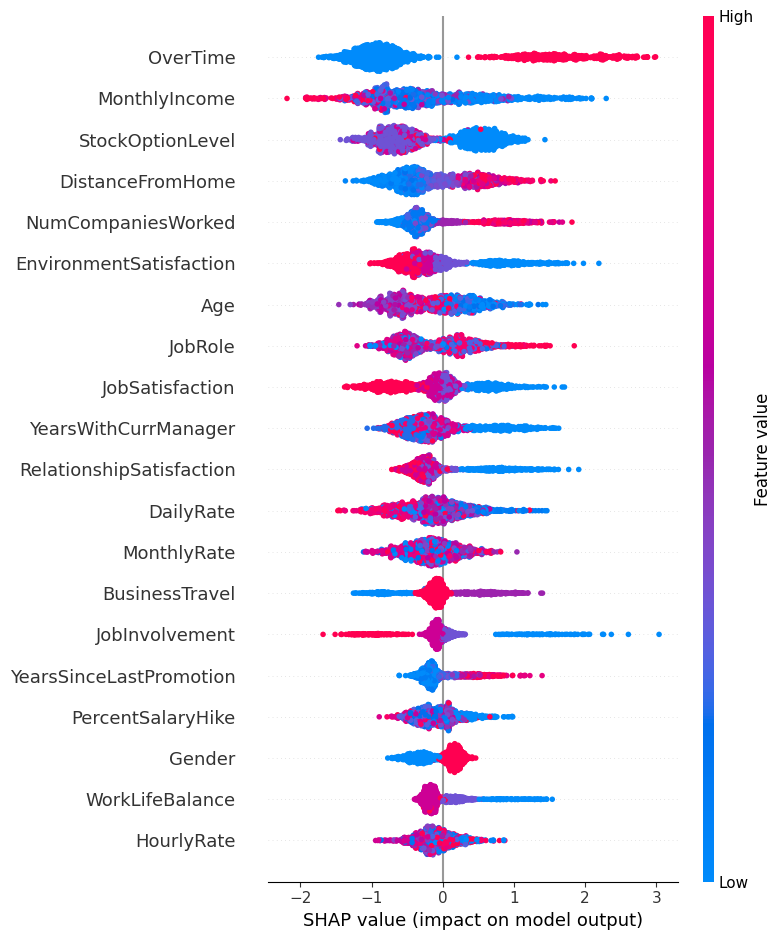

,Feature,Importance
18,OverTime,1.129345
15,MonthlyIncome,0.686347
22,StockOptionLevel,0.616811
4,DistanceFromHome,0.482281
17,NumCompaniesWorked,0.476765
7,EnvironmentSatisfaction,0.457164
0,Age,0.455050
12,JobRole,0.448498
13,JobSatisfaction,0.420975
29,YearsWithCurrManager,0.400682


,OverTime,MonthlyIncome,StockOptionLevel,DistanceFromHome,NumCompaniesWorked,EnvironmentSatisfaction,Age,JobRole,JobSatisfaction,YearsWithCurrManager,RelationshipSatisfaction,DailyRate,Attrition
0,1,5993,0,1,8,2,41,7,4,5,1,1102,1
1,0,5130,1,8,1,3,49,6,2,7,4,279,0
2,1,2090,0,2,6,4,37,2,3,0,2,1373,1
3,1,2909,0,3,1,4,33,6,3,0,3,1392,0
4,0,3468,1,2,9,1,27,2,2,2,4,591,0


,OverTime,MonthlyIncome,StockOptionLevel,DistanceFromHome,NumCompaniesWorked,EnvironmentSatisfaction,Age,JobRole,JobSatisfaction,YearsWithCurrManager,RelationshipSatisfaction,DailyRate,Attrition
2,1,2090,0,2,6,4,37,2,3,0,2,1373,1
3,1,2909,0,3,1,4,33,6,3,0,3,1392,0
5,0,3068,0,2,0,4,32,2,4,6,3,1005,0
9,0,5237,2,27,6,3,36,0,3,7,2,1299,0
11,1,4193,0,15,0,4,29,2,3,8,4,153,0


In [14]:
# Phân tích và tìm ra các đặc trưng quan trọng trong bộ dữ liệu
X = df.drop('Attrition', axis=1)
y = df['Attrition']
shap_explainer = shap.TreeExplainer(XGBClassifier().fit(X, y))
shap_values = shap_explainer.shap_values(X)
shap.summary_plot(shap_values, X)
important_features = np.abs(shap_values).mean(axis=0)
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': important_features})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
display(feature_importance)
# lưu lại 12 đặc trưng quan trọng nhất trong bộ dữ liệu khác
top_12_features = feature_importance['Feature'].head(12).tolist()
df_top_12 = df[top_12_features + ['Attrition']]
display(df_top_12.head())
df_top_12_cleaned_outliers = df_cleaned_outliers[top_12_features + ['Attrition']]
display(df_top_12_cleaned_outliers.head())


---
#**KHAI PHÁ DỮ LIỆU EDA**


*Tổng quan về tình hình nghỉ việc của nhân viên*

Số lượng nhân viên nghỉ việc và không nghỉ việc:


Attrition
0    1233
1     237
Name: count, dtype: int64

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_16588\3138437406.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Attrition', palette='viridis')


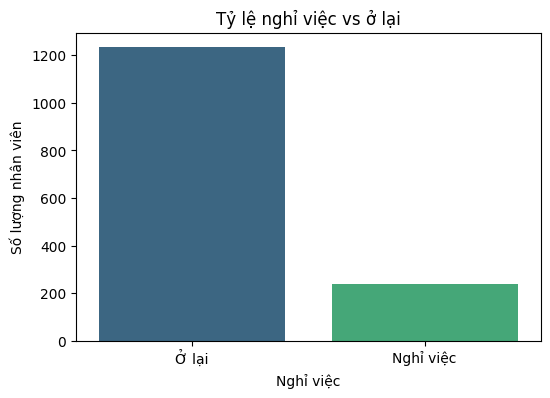


Phần trăm nhân viên nghỉ việc: 16.12%


In [15]:
# 1. Đếm số lượng nhân viên nghỉ việc và không nghỉ việc
attrition_counts = df['Attrition'].value_counts()
print("Số lượng nhân viên nghỉ việc và không nghỉ việc:")
display(attrition_counts)

# 2. Vẽ biểu đồ cột cho tỷ lệ nghỉ việc
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Attrition', palette='viridis')
plt.title('Tỷ lệ nghỉ việc vs ở lại')
plt.xticks([0, 1], ['Ở lại', 'Nghỉ việc'])
plt.xlabel('Nghỉ việc')
plt.ylabel('Số lượng nhân viên')
plt.show()

# 3. Hiển thị phần trăm nhân viên nghỉ việc
if 1 in attrition_counts.index:
	attrition_percentage = (attrition_counts[1] / len(df)) * 100
	print(f"\nPhần trăm nhân viên nghỉ việc: {attrition_percentage:.2f}%")
else:
	print("\nKhông tìm thấy giá trị '1' trong cột 'Attrition'. Kiểm tra lại dữ liệu mã hóa.")

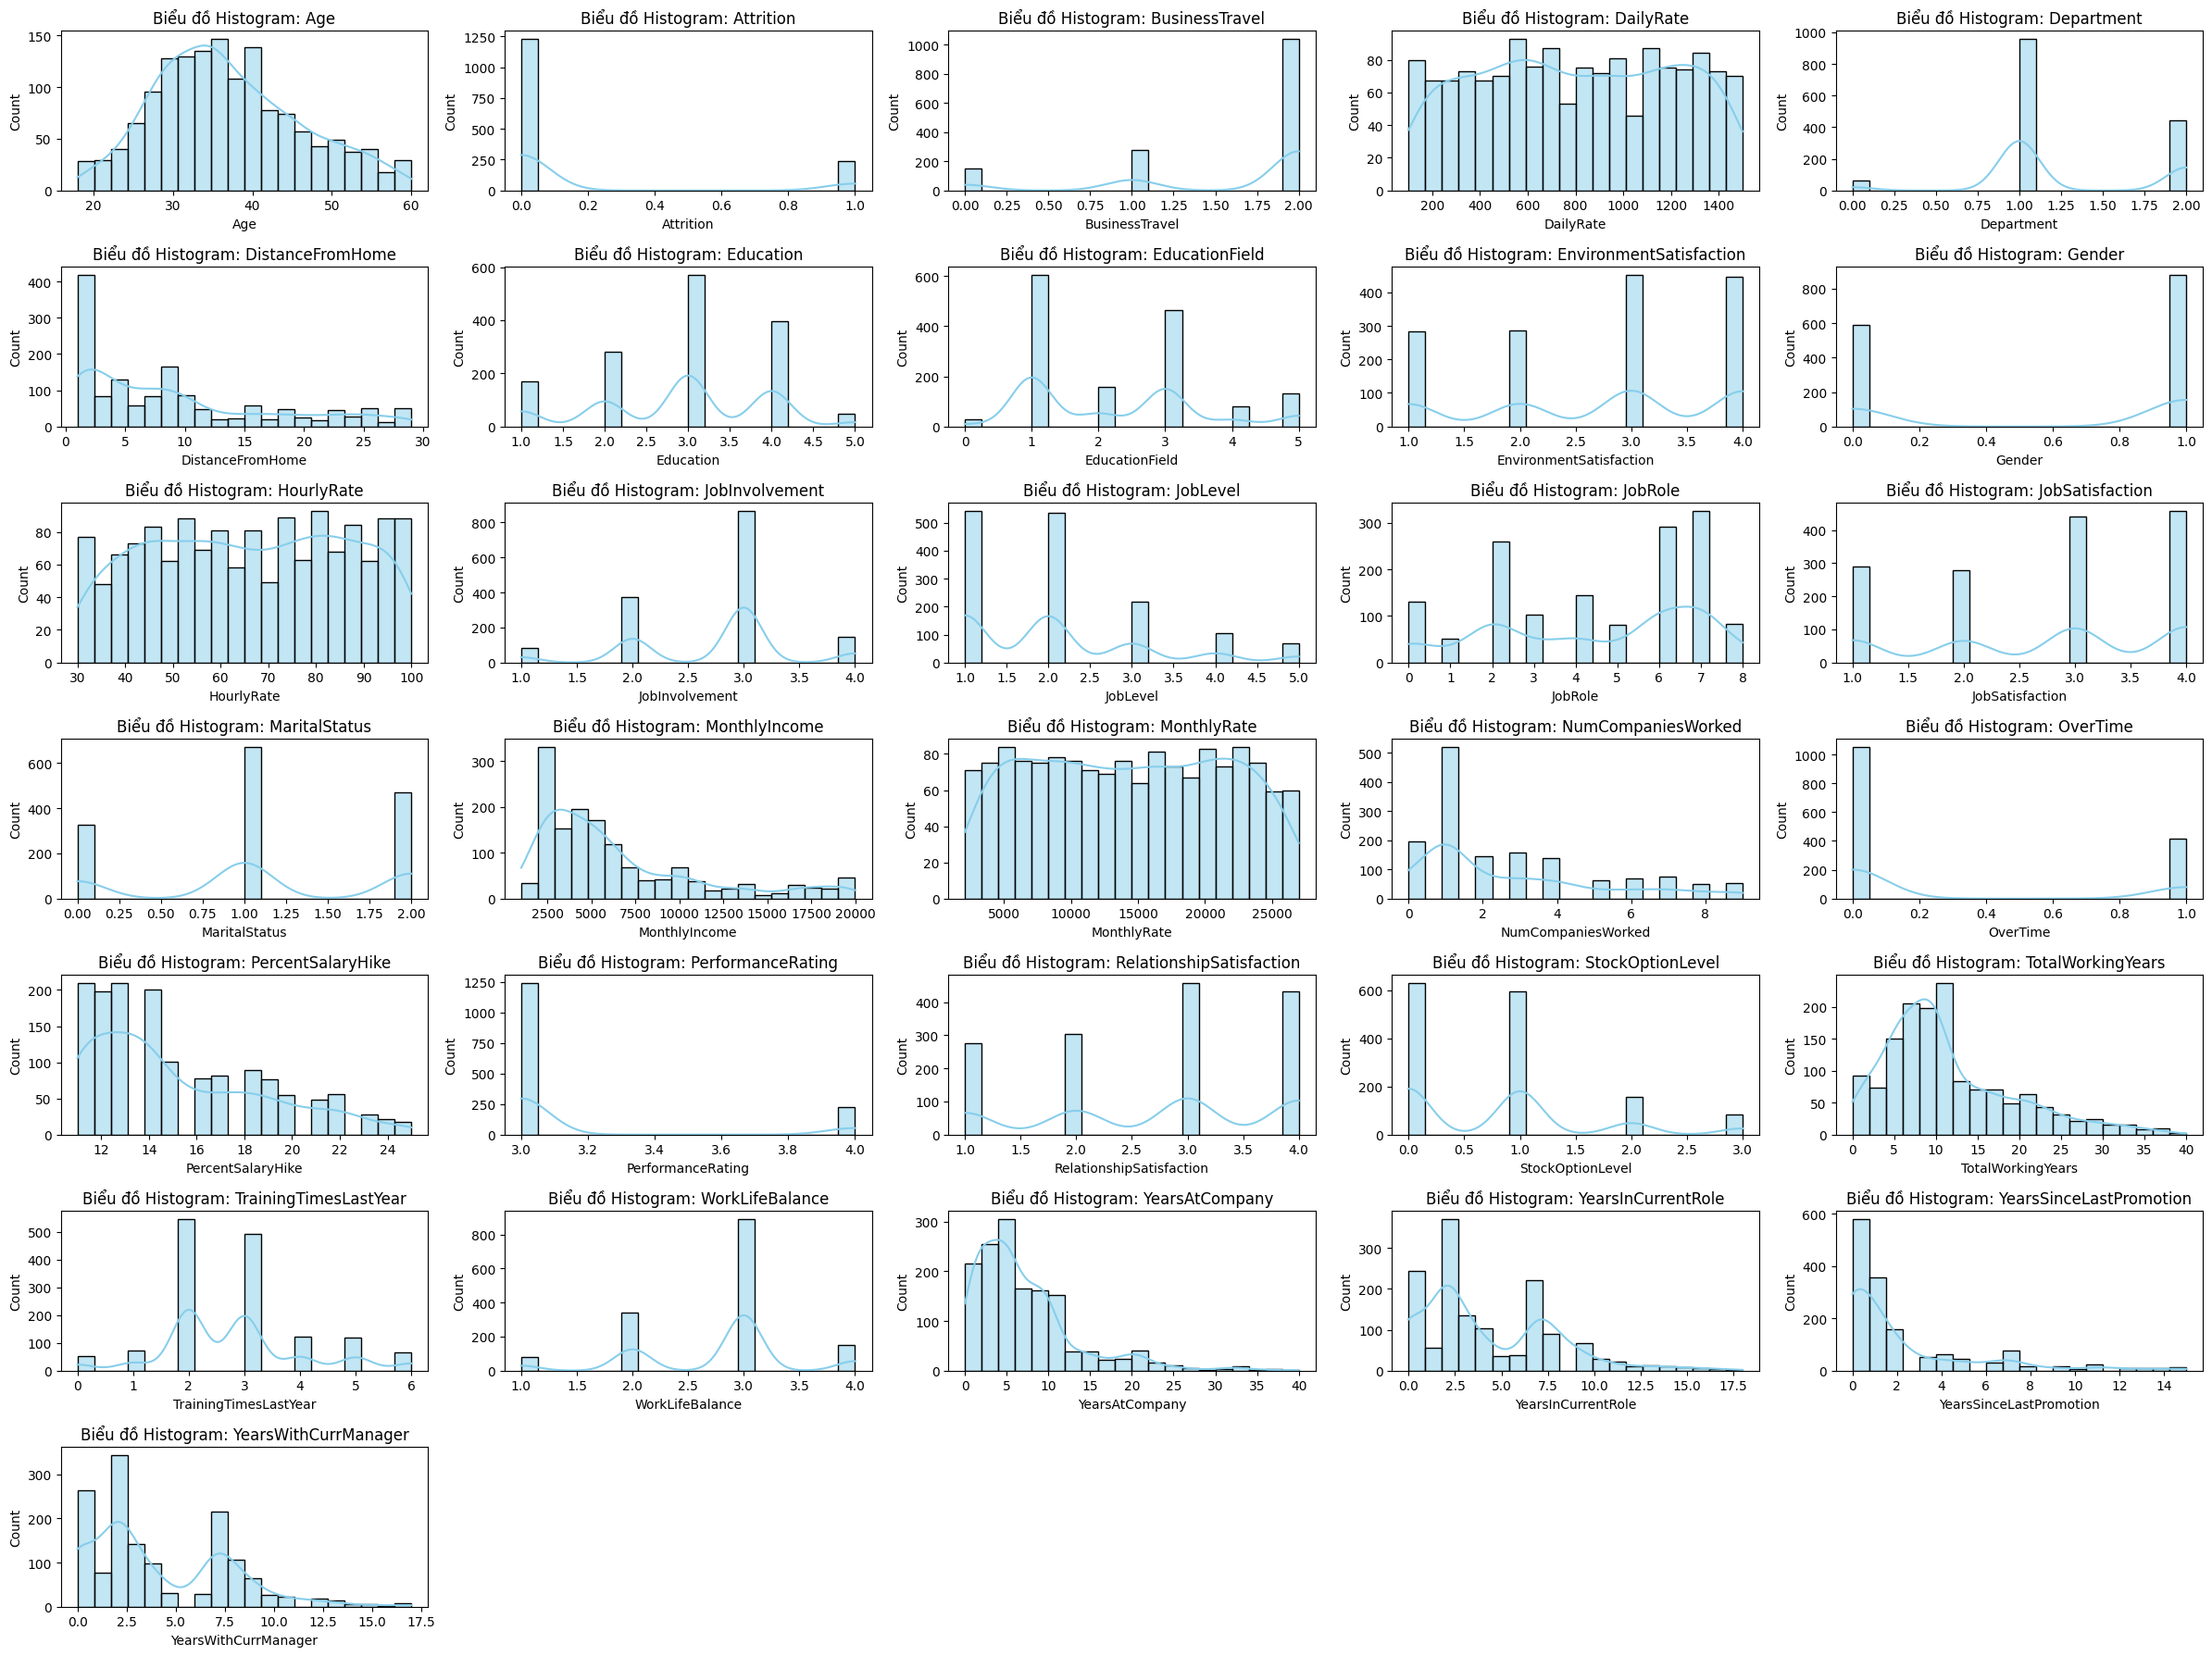

<Figure size 2400x1200 with 0 Axes>

In [16]:
# Lấy các biến số (loại trừ biến kiểu bool)
filtered_numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
# Tính số hàng và cột cho subplot
num_plots = len(filtered_numerical_cols)
cols = 5
rows = math.ceil(num_plots / cols)

plt.figure(figsize=(24, 18))
for idx, col in enumerate(filtered_numerical_cols):
    plt.subplot(rows, cols, idx + 1)
    sns.histplot(df[col], bins=20, kde=True, color='skyblue')
    plt.title(f'Biểu đồ Histogram: {col}')
plt.tight_layout()
plt.show()

# Vẽ countplot cho các biến phân loại (chỉ vẽ cho các biến đã được mã hóa nhị phân)
plt.figure(figsize=(24, 12))
for i, col in enumerate(df.columns[df.dtypes == 'bool']):
    plt.subplot(4, 5, i + 1)
    sns.countplot(x=col, data=df, palette='viridis')
    plt.title(f'Biểu đồ Countplot: {col}')
plt.tight_layout()
plt.show()

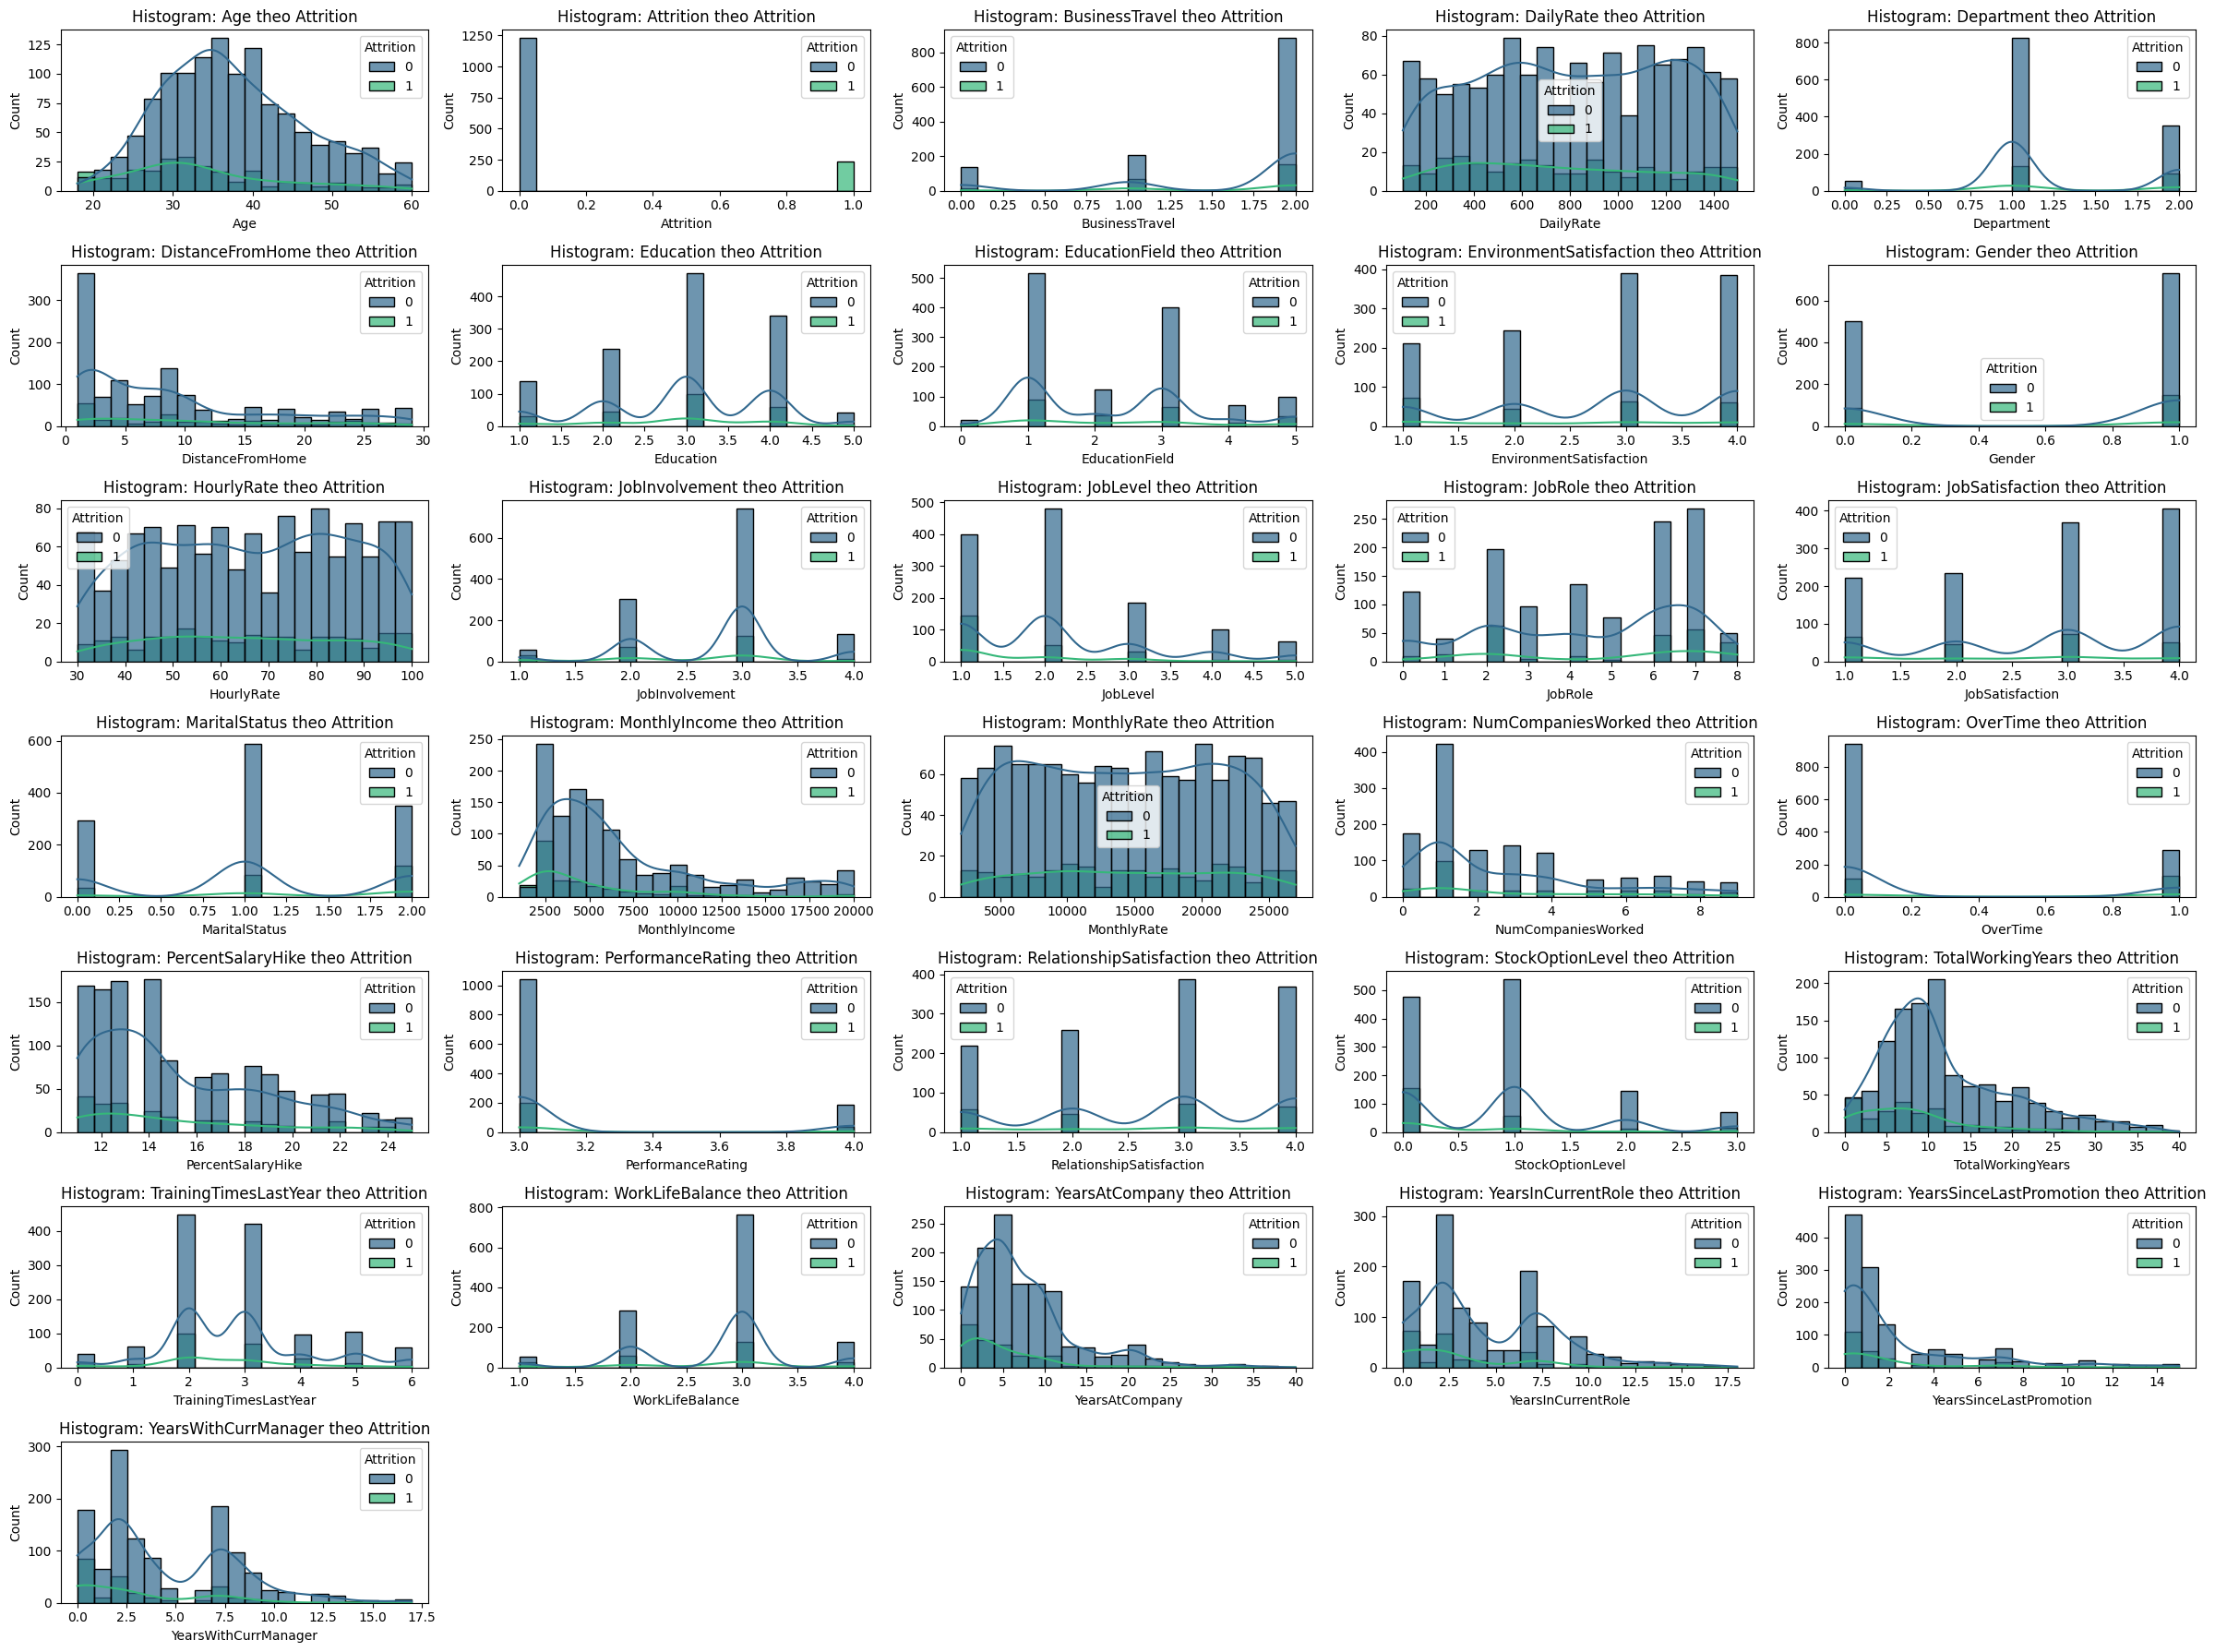

In [17]:
plt.figure(figsize=(24, 18))
for idx, col in enumerate(filtered_numerical_cols):
    plt.subplot(rows, cols, idx + 1)
    sns.histplot(data=df, x=col, hue='Attrition', bins=20, kde=True, palette='viridis', alpha=0.7)
    plt.title(f'Histogram: {col} theo Attrition')
plt.tight_layout()
plt.show()

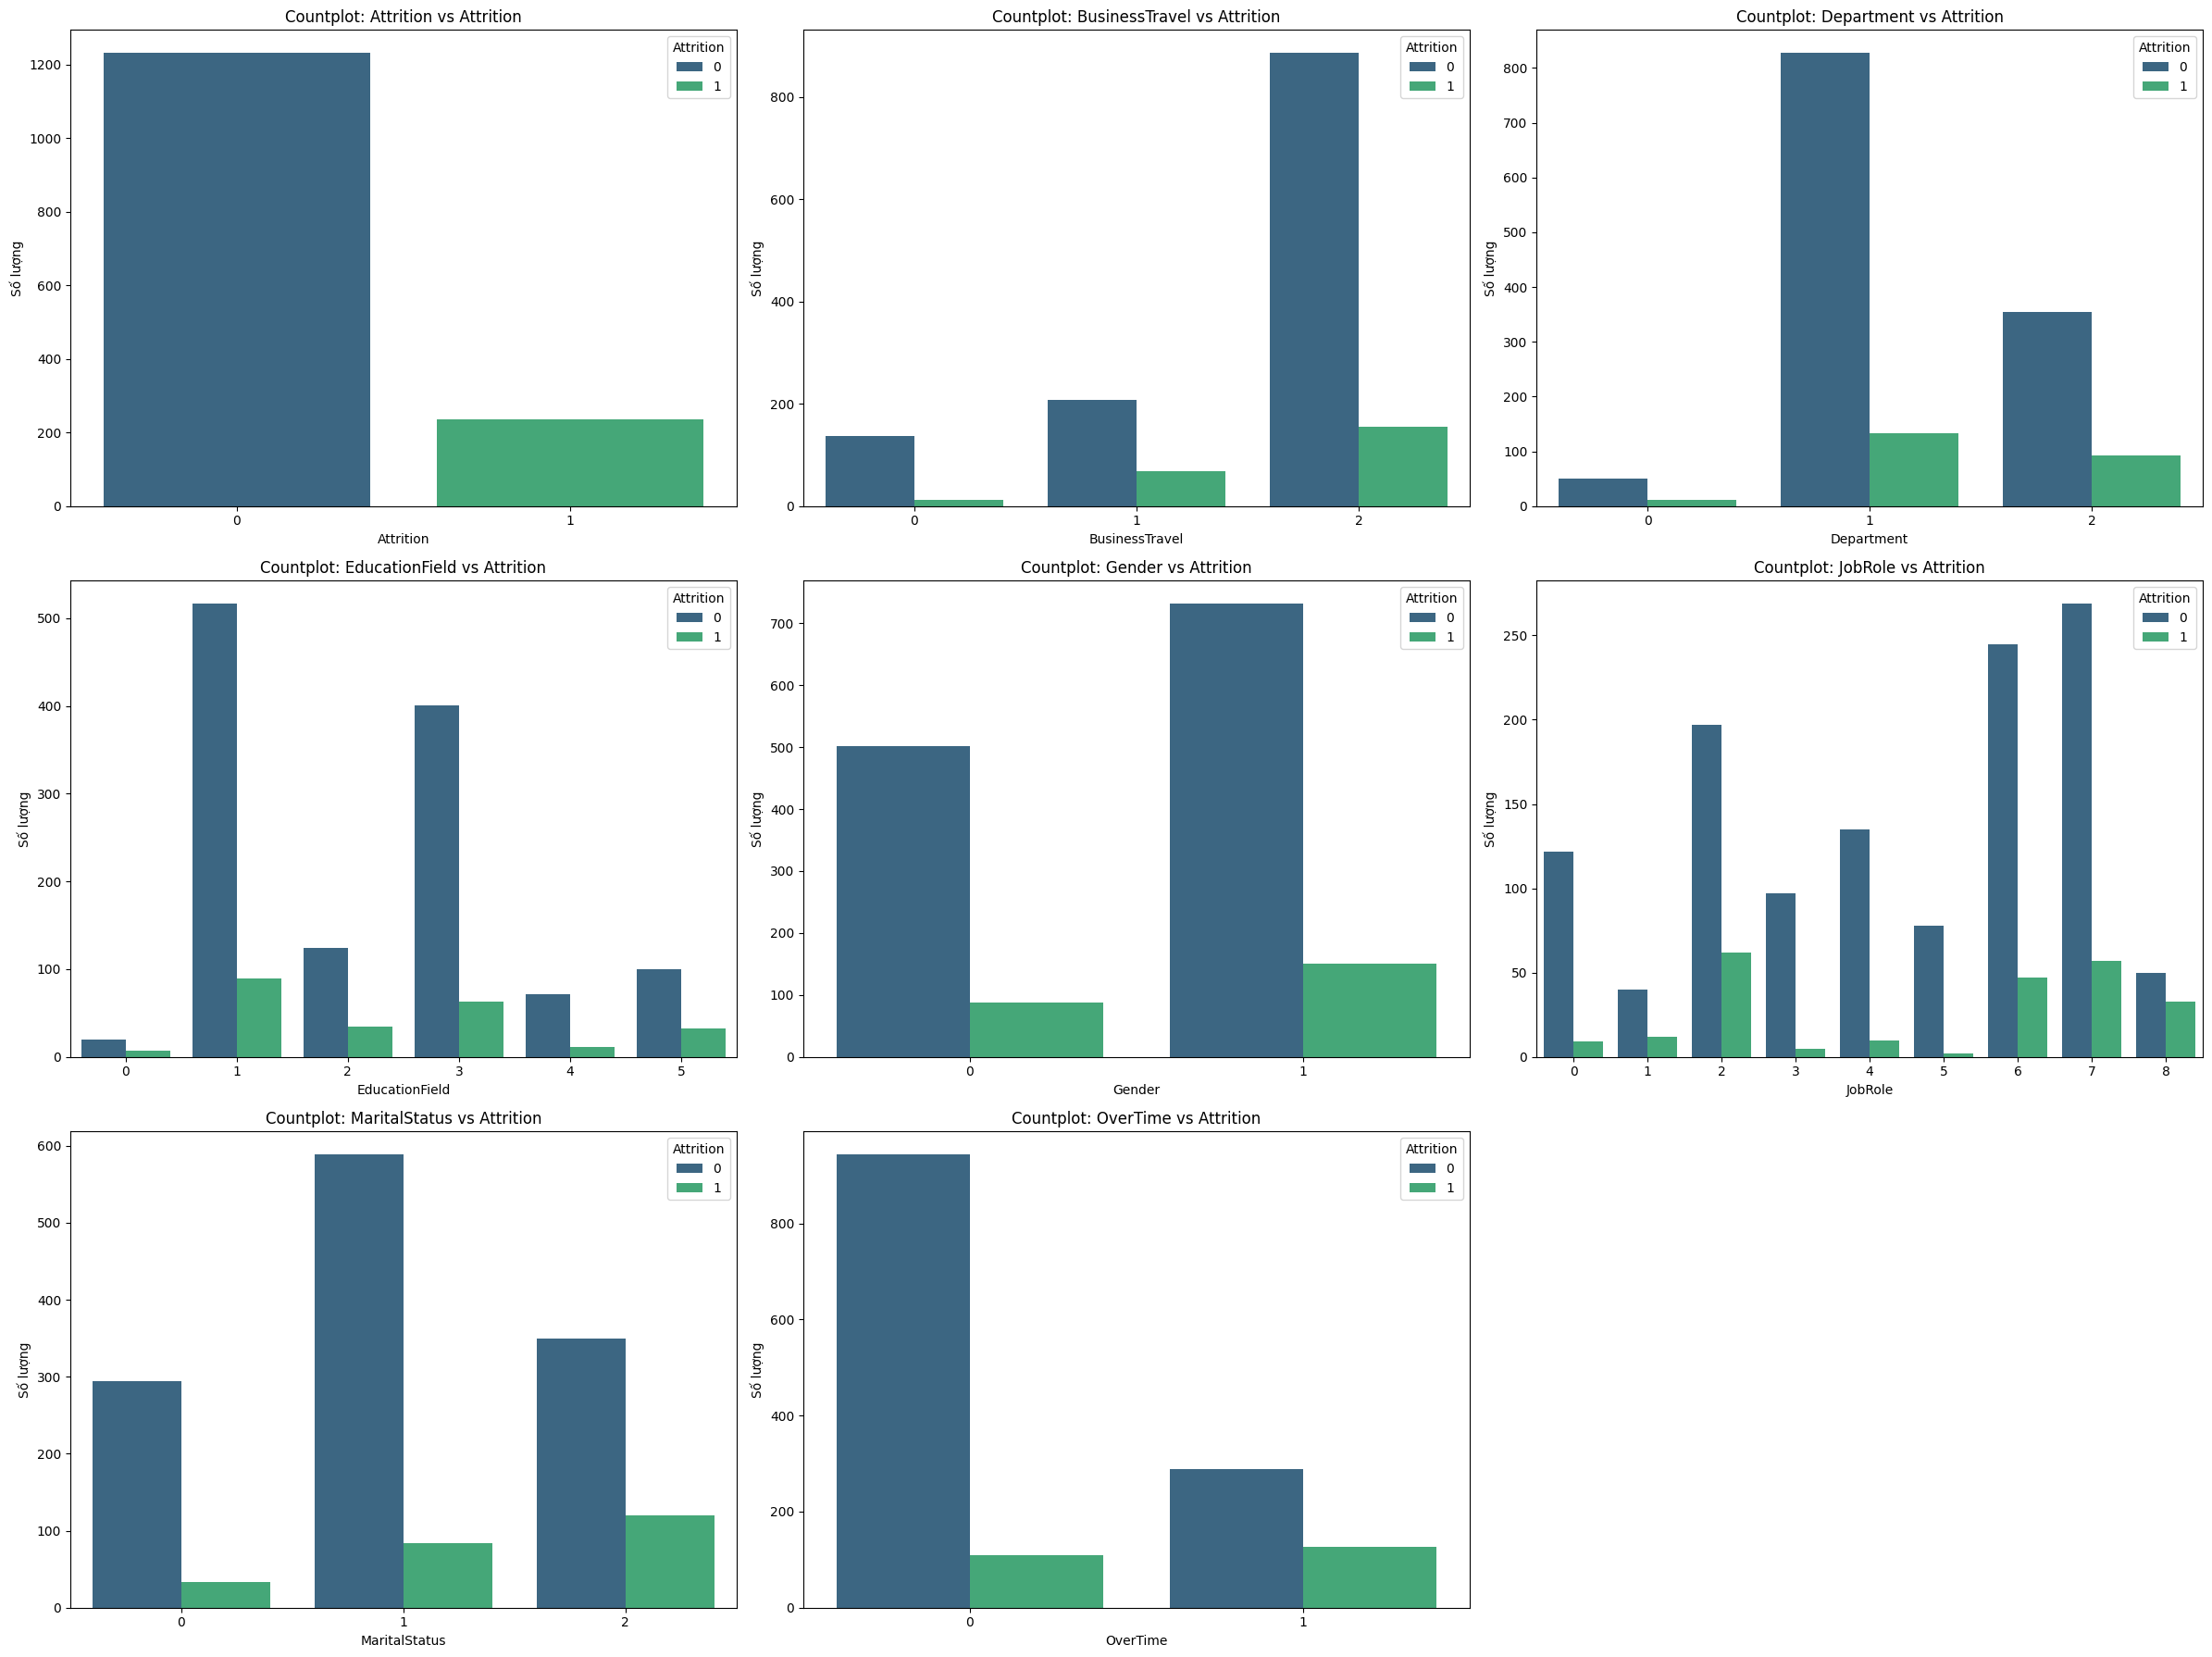

In [18]:
# Vẽ countplot giữa các biến phân loại và biến mục tiêu Attrition
plt.figure(figsize=(24, 18))
for idx, col in enumerate(categorical_cols):
    plt.subplot(3, 3, idx + 1)
    # Nếu cột đã được one-hot encoding, vẽ countplot cho từng biến mới liên quan
    related_cols = [c for c in df.columns if c.startswith(col + "_") or c == col]
    for rel_col in related_cols:
        sns.countplot(data=df, x=rel_col, hue='Attrition', palette='viridis')
        plt.title(f'Countplot: {rel_col} vs Attrition')
        plt.xlabel(rel_col)
        plt.ylabel('Số lượng')
    plt.title(f'Countplot: {col} vs Attrition')
    plt.xlabel(col)
    plt.ylabel('Số lượng')
plt.tight_layout()
plt.show()

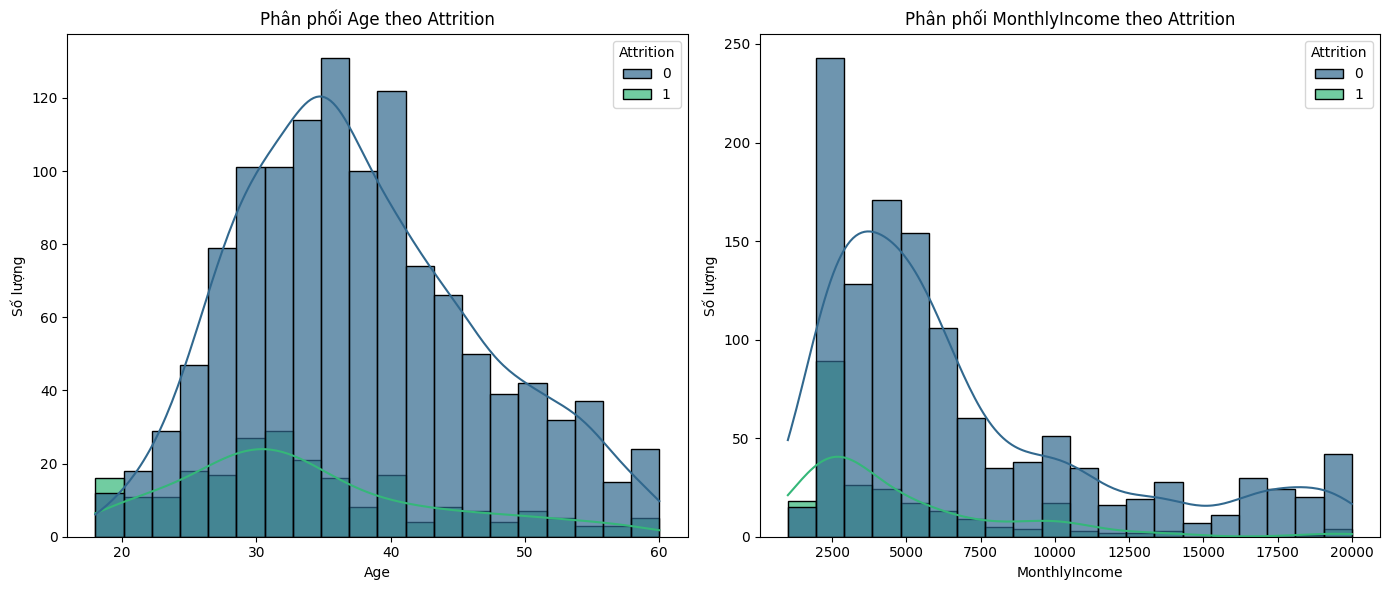

In [19]:
plt.figure(figsize=(14, 6))

# Histogram for Age
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Age', hue='Attrition', bins=20, kde=True, palette='viridis', alpha=0.7)
plt.title('Phân phối Age theo Attrition')
plt.xlabel('Age')
plt.ylabel('Số lượng')

# Histogram for MonthlyIncome
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='MonthlyIncome', hue='Attrition', bins=20, kde=True, palette='viridis', alpha=0.7)
plt.title('Phân phối MonthlyIncome theo Attrition')
plt.xlabel('MonthlyIncome')
plt.ylabel('Số lượng')

plt.tight_layout()
plt.show()

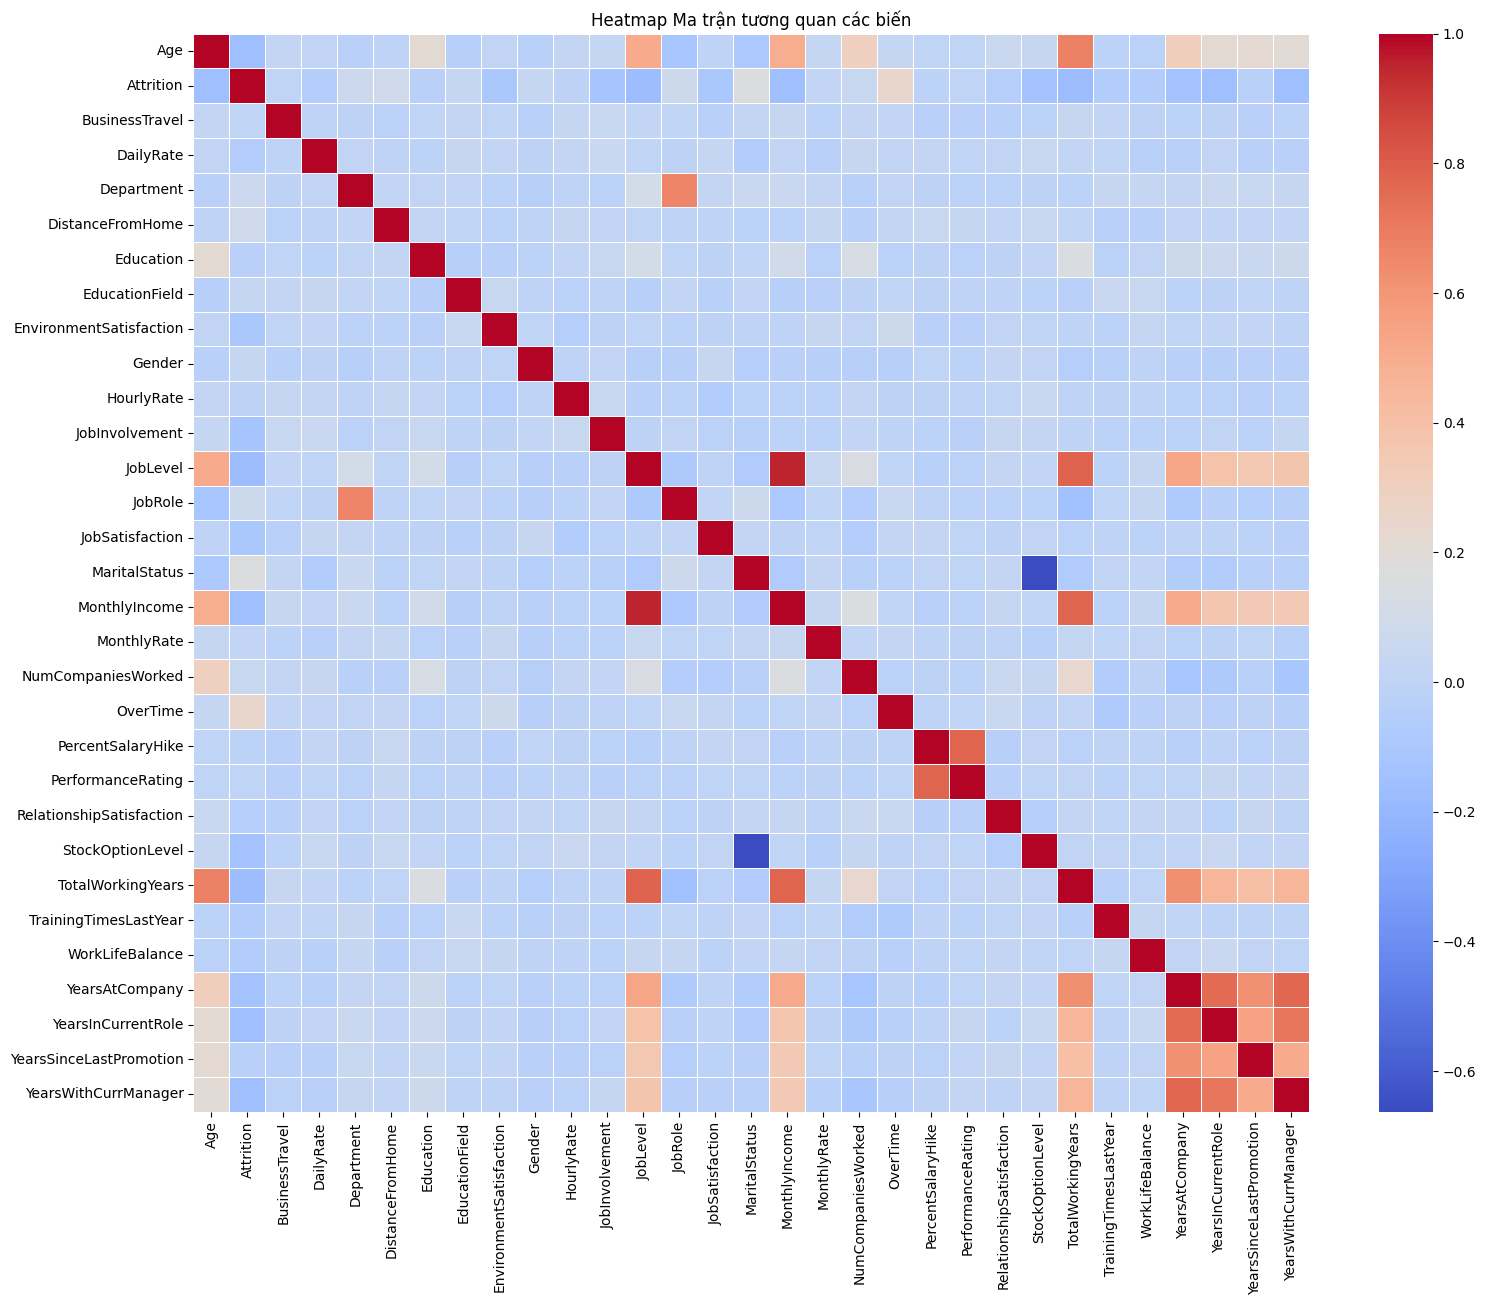

In [20]:
# Tính ma trận tương quan
corr_matrix = df.corr()

# Vẽ heatmap với seaborn
plt.figure(figsize=(18, 14))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Ma trận tương quan các biến')
plt.show()

In [21]:

print("Phân phối của biến mục tiêu 'Attrition':")
print(df['Attrition'].value_counts(normalize=True))
print(df['Attrition'].value_counts())

Phân phối của biến mục tiêu 'Attrition':
Attrition
0    0.838776
1    0.161224
Name: proportion, dtype: float64
Attrition
0    1233
1     237
Name: count, dtype: int64


*Chia bộ dữ liệu ra làm 2 phần 70/30 để huấn luyện mô hình*

In [67]:
# chia bộ dữ liệu ra làm 2 phần 70/30 để huấn luyện mô hình
X = df.drop('Attrition', axis=1)
y = df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(f"Số lượng mẫu trong tập huấn luyện: {X_train.shape[0]}")
print(f"Số lượng mẫu trong tập kiểm tra: {X_test.shape[0]}")
print(f"Số lượng mẫu trong tập huấn luyện theo lớp:\n{y_train.value_counts()}")
print(f"Số lượng mẫu trong tập kiểm tra theo lớp:\n{y_test.value_counts()}")

# chia bộ dữ liệu đã loại bỏ outliers ra làm 2 phần 70/30
X_cleaned_outliers = df_cleaned_outliers.drop('Attrition', axis=1)
y_cleaned_outliers = df_cleaned_outliers['Attrition']
X_cleaned_outliers_train, X_cleaned_outliers_test, y_cleaned_outliers_train, y_cleaned_outliers_test = train_test_split(
	X_cleaned_outliers, y_cleaned_outliers, test_size=0.3, random_state=42, stratify=y_cleaned_outliers
)
print(f"Số lượng mẫu trong tập huấn luyện (sau khi resample và loại bỏ ngoại lệ): {X_cleaned_outliers_train.shape[0]}")
print(f"Số lượng mẫu trong tập kiểm tra (sau khi resample và loại bỏ ngoại lệ): {X_cleaned_outliers_test.shape[0]}")
print(f"Số lượng mẫu trong tập huấn luyện theo lớp (sau khi resample và loại bỏ ngoại lệ):\n{y_cleaned_outliers_train.value_counts()}")
print(f"Số lượng mẫu trong tập kiểm tra theo lớp (sau khi resample và loại bỏ ngoại lệ):\n{y_cleaned_outliers_test.value_counts()}")

# Chia bộ dữ liệu chỉ có 12 đặc trưng quan trọng nhất ra làm 2 phần 70/30
X_top_12 = df_top_12.drop('Attrition', axis=1)
y_top_12 = df_top_12['Attrition']
X_top_12_train, X_top_12_test, y_top_12_train, y_top_12_test = train_test_split(X_top_12, y_top_12, test_size=0.3, random_state=42, stratify=y_top_12)
print(f"Số lượng mẫu trong tập huấn luyện (chỉ 12 đặc trưng quan trọng nhất): {X_top_12_train.shape[0]}")
print(f"Số lượng mẫu trong tập kiểm tra (chỉ 12 đặc trưng quan trọng nhất): {X_top_12_test.shape[0]}")
print(f"Số lượng mẫu trong tập huấn luyện theo lớp (chỉ 12 đặc trưng quan trọng nhất):\n{y_top_12_train.value_counts()}")
print(f"Số lượng mẫu trong tập kiểm tra theo lớp (chỉ 12 đặc trưng quan trọng nhất):\n{y_top_12_test.value_counts()}")


Số lượng mẫu trong tập huấn luyện: 1029
Số lượng mẫu trong tập kiểm tra: 441
Số lượng mẫu trong tập huấn luyện theo lớp:
Attrition
0    863
1    166
Name: count, dtype: int64
Số lượng mẫu trong tập kiểm tra theo lớp:
Attrition
0    370
1     71
Name: count, dtype: int64
Số lượng mẫu trong tập huấn luyện (sau khi resample và loại bỏ ngoại lệ): 545
Số lượng mẫu trong tập kiểm tra (sau khi resample và loại bỏ ngoại lệ): 234
Số lượng mẫu trong tập huấn luyện theo lớp (sau khi resample và loại bỏ ngoại lệ):
Attrition
0    448
1     97
Name: count, dtype: int64
Số lượng mẫu trong tập kiểm tra theo lớp (sau khi resample và loại bỏ ngoại lệ):
Attrition
0    193
1     41
Name: count, dtype: int64
Số lượng mẫu trong tập huấn luyện (chỉ 12 đặc trưng quan trọng nhất): 1029
Số lượng mẫu trong tập kiểm tra (chỉ 12 đặc trưng quan trọng nhất): 441
Số lượng mẫu trong tập huấn luyện theo lớp (chỉ 12 đặc trưng quan trọng nhất):
Attrition
0    863
1    166
Name: count, dtype: int64
Số lượng mẫu trong tập 

**Xử lý mất cân bằng dữ liệu dùng phương pháp SMOTE**

In [64]:
# Xử lý mất cân bằng dữ liệu sử dụng SMOTE trên bộ dữ liệu huấn luyện
smote = SMOTE(random_state=42)
X_resampled_train, y_resampled_train = smote.fit_resample(X_train, y_train)
print(f"Số lượng mẫu trong tập huấn luyện sau khi resample: {X_resampled_train.shape[0]}")
print(f"Số lượng mẫu trong tập huấn luyện theo lớp sau khi resample:\n{y_resampled_train.value_counts()}")
# Xử lý mất cân bằng dữ liệu sử dụng SMOTE trên bộ dữ liệu đã loại bỏ outliers
smote_outliers = SMOTE(random_state=42)
X_resampled_cleaned_outliers_train, y_resampled_cleaned_outliers_train = smote_outliers.fit_resample(X_cleaned_outliers_train, y_cleaned_outliers_train)
print(f"Số lượng mẫu trong tập huấn luyện (sau khi loại bỏ outliers) sau khi resample: {X_resampled_cleaned_outliers_train.shape[0]}")
print(f"Số lượng mẫu trong tập huấn luyện (sau khi loại bỏ outliers) theo lớp sau khi resample:\n{y_resampled_cleaned_outliers_train.value_counts()}")
# Xử lý mất cân bằng dữ liệu sử dụng SMOTE trên bộ dữ liệu chỉ có 12 đặc trưng quan trọng nhất
smote_top_12 = SMOTE(random_state=42)
X_resampled_top12_train, y_resampled_top_12_train = smote_top_12.fit_resample(X_top_12_train, y_top_12_train)
print(f"Số lượng mẫu trong tập huấn luyện (chỉ 12 đặc trưng quan trọng nhất) sau khi resample: {X_resampled_top12_train.shape[0]}")
print(f"Số lượng mẫu trong tập huấn luyện (chỉ 12 đặc trưng quan trọng nhất) theo lớp sau khi resample:\n{y_resampled_top_12_train.value_counts()}")


Số lượng mẫu trong tập huấn luyện sau khi resample: 1726
Số lượng mẫu trong tập huấn luyện theo lớp sau khi resample:
Attrition
0    863
1    863
Name: count, dtype: int64
Số lượng mẫu trong tập huấn luyện (sau khi loại bỏ outliers) sau khi resample: 896
Số lượng mẫu trong tập huấn luyện (sau khi loại bỏ outliers) theo lớp sau khi resample:
Attrition
1    448
0    448
Name: count, dtype: int64
Số lượng mẫu trong tập huấn luyện (chỉ 12 đặc trưng quan trọng nhất) sau khi resample: 1726
Số lượng mẫu trong tập huấn luyện (chỉ 12 đặc trưng quan trọng nhất) theo lớp sau khi resample:
Attrition
0    863
1    863
Name: count, dtype: int64


# Xây dựng mô hình (Build Model)

Xây dựng mô hình với bộ dữ liệu chưa qua resample bằng phương pháp SMOTE

Báo cáo phân loại:
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       370
           1       0.80      0.23      0.35        71

    accuracy                           0.87       441
   macro avg       0.83      0.61      0.64       441
weighted avg       0.86      0.87      0.83       441



c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


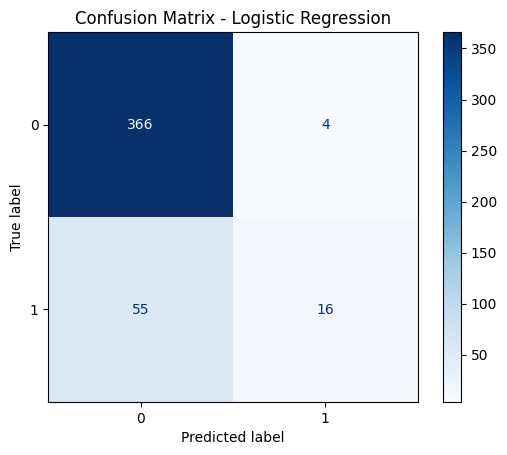

Độ chính xác của mô hình: 0.8662


In [24]:
# Huấn luyện mô hình Logistic Regression và đánh giá
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Báo cáo phân loại:") 
print(classification_report(y_test, y_pred))
# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=[0,1])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()
print(f"Độ chính xác của mô hình: {accuracy_score(y_test, y_pred):.4f}")

Báo cáo phân loại:
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       370
           1       0.27      0.24      0.25        71

    accuracy                           0.77       441
   macro avg       0.56      0.56      0.56       441
weighted avg       0.76      0.77      0.77       441



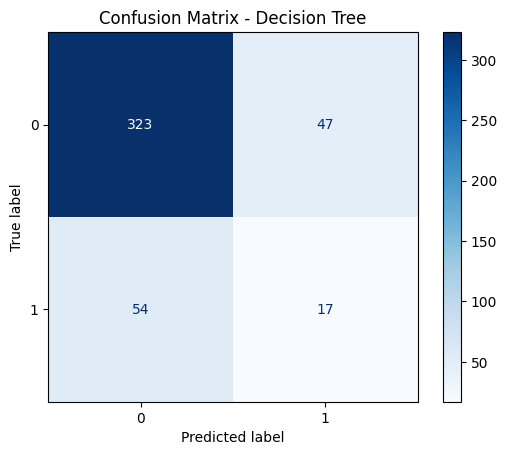

Độ chính xác của mô hình: 0.7710


In [25]:
# Huấn luyện mô hình Decision Tree và đánh giá
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)

y_pred_dt = model_dt.predict(X_test)

print("Báo cáo phân loại:")
print(classification_report(y_test, y_pred_dt))
# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_dt), display_labels=[0,1])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Decision Tree')
plt.show()
print(f"Độ chính xác của mô hình: {accuracy_score(y_test, y_pred_dt):.4f}")

Báo cáo phân loại:
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       370
           1       0.50      0.13      0.20        71

    accuracy                           0.84       441
   macro avg       0.68      0.55      0.56       441
weighted avg       0.80      0.84      0.80       441



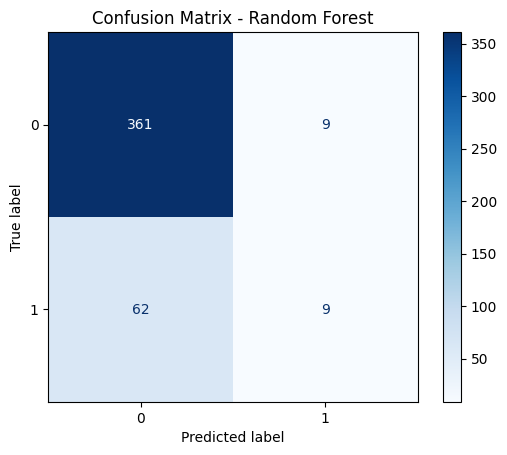

Độ chính xác của mô hình: 0.8390


In [26]:
#huấn luyện mô hình random forest
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
print("Báo cáo phân loại:")
print(classification_report(y_test, y_pred_rf))
# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_rf), display_labels=[0,1])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Random Forest')
plt.show()
print(f"Độ chính xác của mô hình: {accuracy_score(y_test, y_pred_rf):.4f}")

Giá trị k tốt nhất: 8 với độ chính xác: 0.8435
Báo cáo phân loại:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       370
           1       1.00      0.03      0.05        71

    accuracy                           0.84       441
   macro avg       0.92      0.51      0.48       441
weighted avg       0.87      0.84      0.78       441



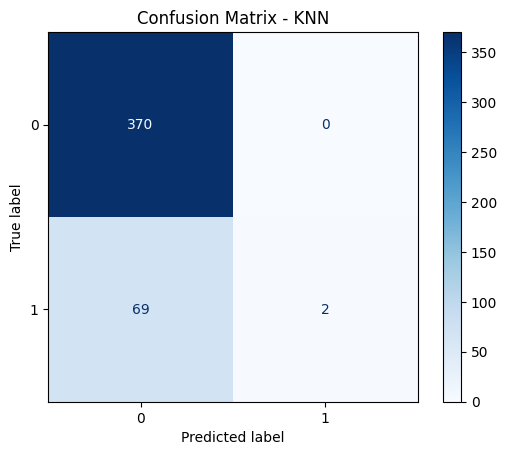

Độ chính xác của mô hình: 0.8435


In [27]:
#huấn luyện mô hình KNN (K-Nearest Neighbors) với điểm k chạy từ 1 tới 30
best_k = 1
best_accuracy = 0
for k in range(1, 31):
    model_knn = KNeighborsClassifier(n_neighbors=k)
    model_knn.fit(X_train, y_train)
    y_pred_knn = model_knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_knn)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k
print(f"Giá trị k tốt nhất: {best_k} với độ chính xác: {best_accuracy:.4f}")
model_knn = KNeighborsClassifier(n_neighbors=best_k)
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)
print("Báo cáo phân loại:")
print(classification_report(y_test, y_pred_knn))
# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_knn), display_labels=[0,1])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - KNN')
plt.show()
print(f"Độ chính xác của mô hình: {accuracy_score(y_test, y_pred_knn):.4f}")



Báo cáo phân loại:

c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:01:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



              precision    recall  f1-score   support

           0       0.87      0.97      0.92       370
           1       0.63      0.24      0.35        71

    accuracy                           0.85       441
   macro avg       0.75      0.61      0.63       441
weighted avg       0.83      0.85      0.83       441



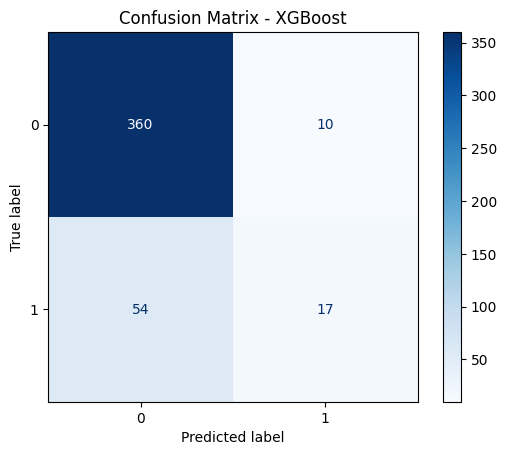

Độ chính xác của mô hình: 0.8549


In [28]:
# Huấn luyện mô hình XGBoost với dữ liệu chỉ qua tiền xử lý 
model_xgb = XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42)
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)

print("Báo cáo phân loại:")
print(classification_report(y_test, y_pred_xgb))
# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_xgb), display_labels=[0,1])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - XGBoost')
plt.show()
print(f"Độ chính xác của mô hình: {accuracy_score(y_test, y_pred_xgb):.4f}")

[LightGBM] [Info] Number of positive: 166, number of negative: 863
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000417 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1132
[LightGBM] [Info] Number of data points in the train set: 1029, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.161322 -> initscore=-1.648427
[LightGBM] [Info] Start training from score -1.648427
Báo cáo phân loại:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       370
           1       0.67      0.25      0.37        71

    accuracy                           0.86       441
   macro avg       0.77      0.61      0.64       441
weighted avg       0.84      0.86      0.83       441


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000417 secon

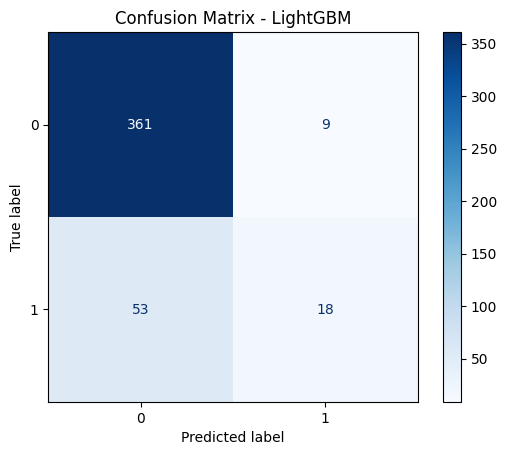

Độ chính xác của mô hình: 0.8594


In [29]:
# Huấn luyện mô hình LightGBM và đánh giá
model_lgb = lgb.LGBMClassifier(random_state=42)
model_lgb.fit(X_train, y_train)
y_pred_lgb = model_lgb.predict(X_test)
print("Báo cáo phân loại:")
print(classification_report(y_test, y_pred_lgb))
# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_lgb), display_labels=[0,1])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - LightGBM')
plt.show()
print(f"Độ chính xác của mô hình: {accuracy_score(y_test, y_pred_lgb):.4f}")


Báo cáo phân loại:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       370
           1       0.00      0.00      0.00        71

    accuracy                           0.84       441
   macro avg       0.42      0.50      0.46       441
weighted avg       0.70      0.84      0.77       441



c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

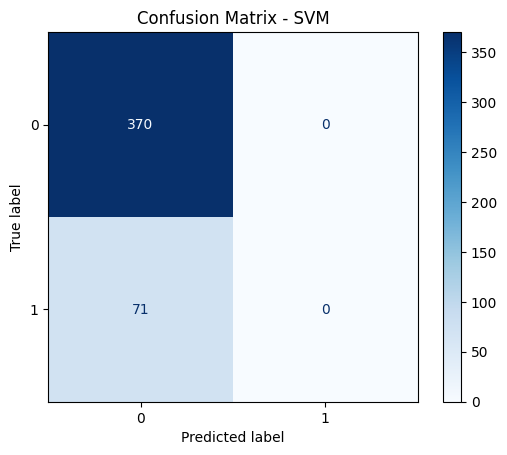

Độ chính xác của mô hình: 0.8390


In [30]:
# Huấn luyện mô hình SVMmodel_svm = SVC(random_state=42)
model_svm = SVC(random_state=42)
model_svm.fit(X_train, y_train)
y_pred_svm = model_svm.predict(X_test)
print("Báo cáo phân loại:")
print(classification_report(y_test, y_pred_svm))
# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_svm), display_labels=[0,1])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - SVM')
plt.show()
print(f"Độ chính xác của mô hình: {accuracy_score(y_test, y_pred_svm):.4f}")


c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.77923 |  0:00:00s
epoch 1  | loss: 0.61576 |  0:00:00s
epoch 2  | loss: 0.51978 |  0:00:00s
epoch 3  | loss: 0.50635 |  0:00:00s
epoch 4  | loss: 0.47943 |  0:00:00s
epoch 5  | loss: 0.46874 |  0:00:00s
epoch 6  | loss: 0.46715 |  0:00:00s
epoch 7  | loss: 0.46118 |  0:00:00s
epoch 8  | loss: 0.42056 |  0:00:00s
epoch 9  | loss: 0.43787 |  0:00:00s
epoch 10 | loss: 0.42918 |  0:00:00s
epoch 6  | loss: 0.46715 |  0:00:00s
epoch 7  | loss: 0.46118 |  0:00:00s
epoch 8  | loss: 0.42056 |  0:00:00s
epoch 9  | loss: 0.43787 |  0:00:00s
epoch 10 | loss: 0.42918 |  0:00:00s
epoch 11 | loss: 0.4226  |  0:00:00s
epoch 12 | loss: 0.4114  |  0:00:00s
epoch 13 | loss: 0.4051  |  0:00:00s
epoch 14 | loss: 0.39741 |  0:00:00s
epoch 15 | loss: 0.40182 |  0:00:00s
epoch 11 | loss: 0.4226  |  0:00:00s
epoch 12 | loss: 0.4114  |  0:00:00s
epoch 13 | loss: 0.4051  |  0:00:00s
epoch 14 | loss: 0.39741 |  0:00:00s
epoch 15 | loss: 0.40182 |  0:00:00s
epoch 16 | loss: 0.3948  |  0:00:00s
e

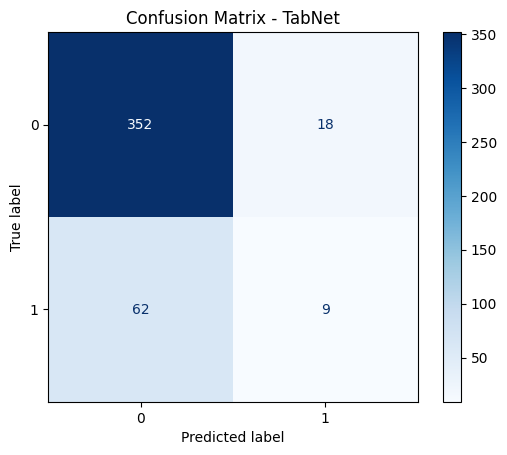

Độ chính xác của mô hình: 0.8186


In [31]:
# Huấn luyện mô hình Tabnet
# TabNetClassifier không nhận 'random_state' — dùng 'seed' nếu cần khởi tạo ngẫu nhiên
model_tabnet = TabNetClassifier(seed=42)
model_tabnet.fit(X_train.values, y_train.values, max_epochs=100, patience=10, batch_size=1024, virtual_batch_size=128)
y_pred_tabnet = model_tabnet.predict(X_test.values)
print("Báo cáo phân loại:")
print(classification_report(y_test, y_pred_tabnet))
# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_tabnet), display_labels=[0,1])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - TabNet')
plt.show()
print(f"Độ chính xác của mô hình: {accuracy_score(y_test, y_pred_tabnet):.4f}")


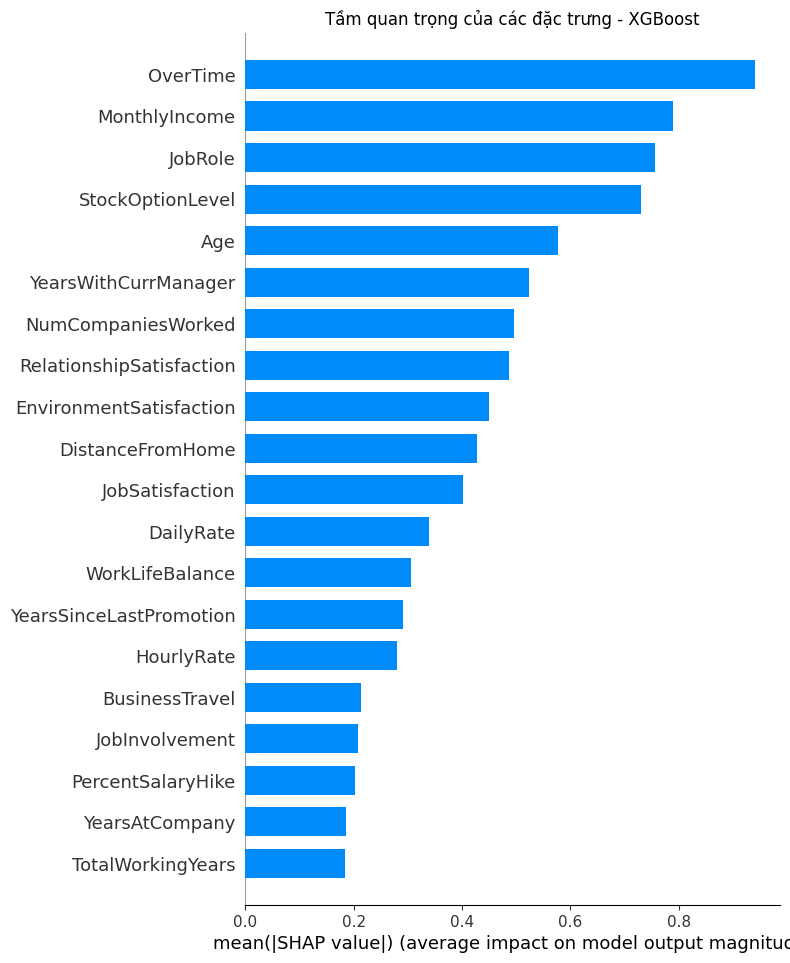

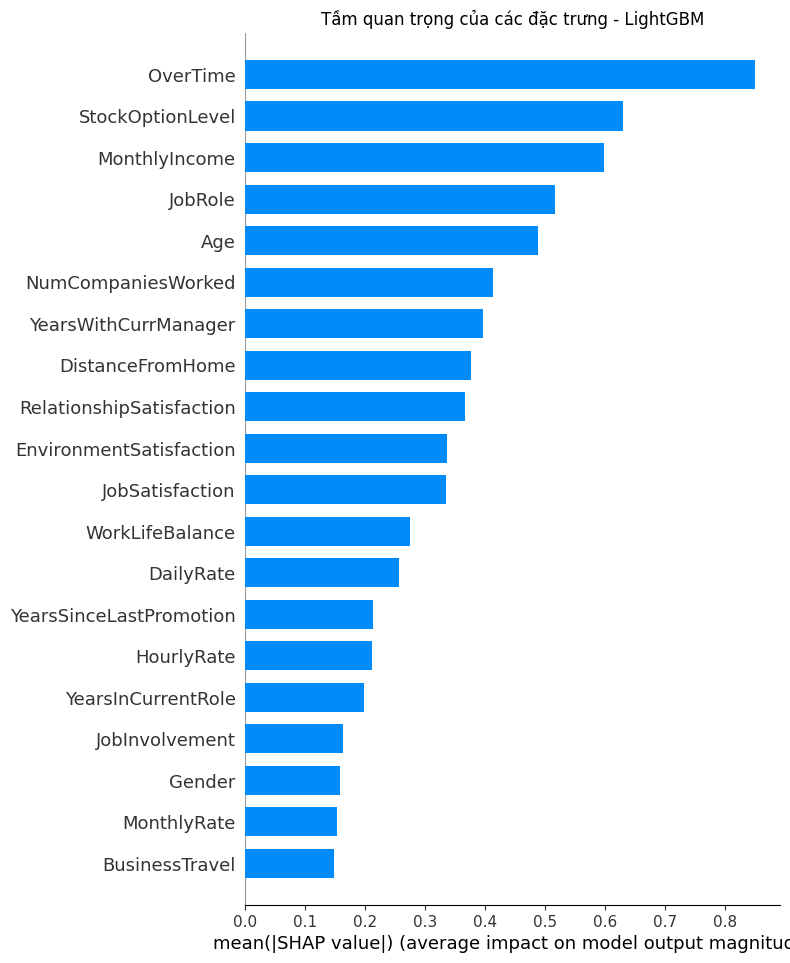

In [32]:
# Dùng SHAP để giải thích các mô hình đã huấn luyện
explainer_xgb = shap.Explainer(model_xgb)
shap_values_xgb = explainer_xgb(X_test)
shap.summary_plot(shap_values_xgb, X_test, plot_type="bar", show=False)
plt.title("Tầm quan trọng của các đặc trưng - XGBoost")
plt.show()
explainer_lgb = shap.Explainer(model_lgb)
shap_values_lgb = explainer_lgb(X_test)
shap.summary_plot(shap_values_lgb, X_test, plot_type="bar", show=False)
plt.title("Tầm quan trọng của các đặc trưng - LightGBM")
plt.show()


Xây dựng mô hình với bộ dữ liệu đã qua resample bằng phương pháp SMOTE

Báo cáo phân loại:
              precision    recall  f1-score   support

           0       0.90      0.78      0.84       370
           1       0.32      0.54      0.40        71

    accuracy                           0.74       441
   macro avg       0.61      0.66      0.62       441
weighted avg       0.81      0.74      0.77       441



c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


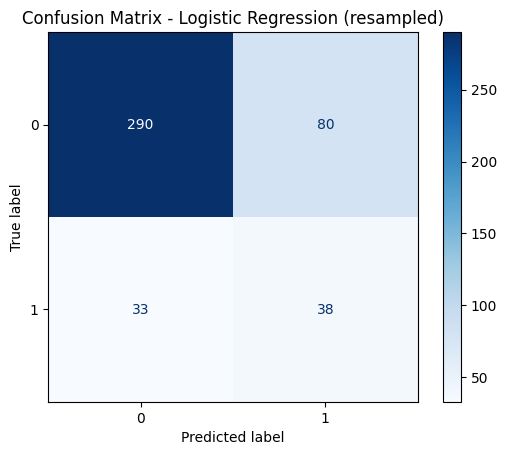

Độ chính xác của mô hình: 0.7438


In [33]:
#Dùng data đã qua resample để train model Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_resampled_train, y_resampled_train)
y_pred = model.predict(X_test)
print("Báo cáo phân loại:")
print(classification_report(y_test, y_pred))
# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=[0,1])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Logistic Regression (resampled)')
plt.show()
print(f"Độ chính xác của mô hình: {accuracy_score(y_test, y_pred):.4f}")

Báo cáo phân loại:
              precision    recall  f1-score   support

           0       0.88      0.78      0.82       370
           1       0.28      0.45      0.34        71

    accuracy                           0.72       441
   macro avg       0.58      0.61      0.58       441
weighted avg       0.78      0.72      0.75       441



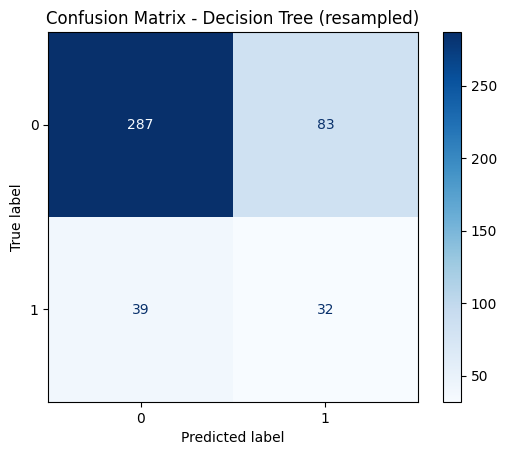

Độ chính xác của mô hình: 0.7234


In [34]:
# Huấn luyện mô hình Decision Tree và đánh giá với dữ liệu đã qua resample
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_resampled_train, y_resampled_train)

y_pred_dt = model_dt.predict(X_test)

print("Báo cáo phân loại:")
print(classification_report(y_test, y_pred_dt))
# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_dt), display_labels=[0,1])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Decision Tree (resampled)')
plt.show()
print(f"Độ chính xác của mô hình: {accuracy_score(y_test, y_pred_dt):.4f}")

Báo cáo phân loại:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       370
           1       0.39      0.31      0.34        71

    accuracy                           0.81       441
   macro avg       0.63      0.61      0.62       441
weighted avg       0.79      0.81      0.80       441



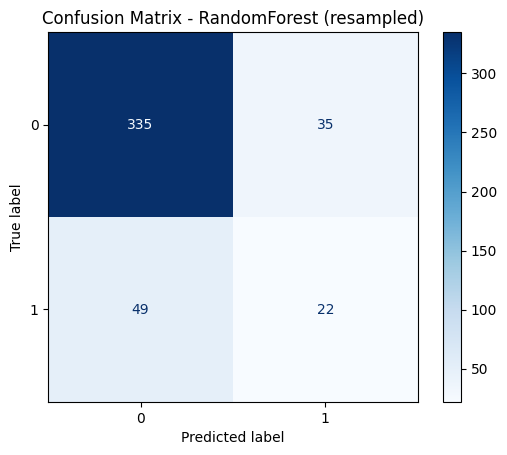

Độ chính xác của mô hình: 0.8095


In [35]:
# Huấn luyện mô hình RandomForest và đánh giá với dữ liệu đã qua resample
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_resampled_train, y_resampled_train)
y_pred_rf = model_rf.predict(X_test)
print("Báo cáo phân loại:")
print(classification_report(y_test, y_pred_rf))
# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_rf), display_labels=[0,1])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - RandomForest (resampled)')
plt.show()
print(f"Độ chính xác của mô hình: {accuracy_score(y_test, y_pred_rf):.4f}")

Giá trị k tốt nhất: 2 với độ chính xác: 0.7392
Báo cáo phân loại:
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       370
           1       0.28      0.38      0.32        71

    accuracy                           0.74       441
   macro avg       0.57      0.59      0.58       441
weighted avg       0.78      0.74      0.76       441



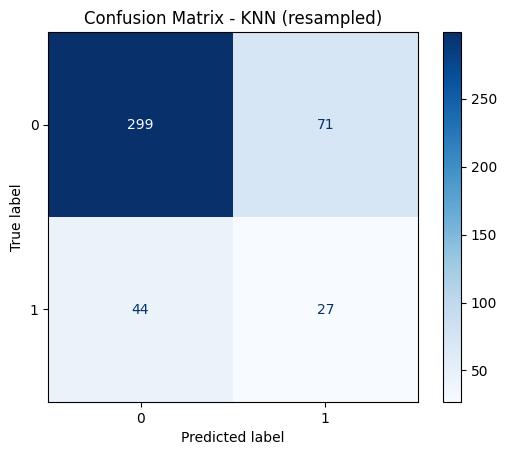

Độ chính xác của mô hình: 0.7392


In [37]:
# Huấn luyện mô hình KNN với dữ liệu đã qua resample cho K chạy từ 1 đến 30
best_k = 1
best_accuracy = 0
for k in range(1, 31):
    model_knn = KNeighborsClassifier(n_neighbors=k)
    model_knn.fit(X_resampled_train, y_resampled_train)
    y_pred_knn = model_knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_knn)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k
print(f"Giá trị k tốt nhất: {best_k} với độ chính xác: {best_accuracy:.4f}")
model_knn = KNeighborsClassifier(n_neighbors=best_k)
model_knn.fit(X_resampled_train, y_resampled_train)
y_pred_knn = model_knn.predict(X_test)
print("Báo cáo phân loại:")
print(classification_report(y_test, y_pred_knn))
# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_knn), display_labels=[0,1])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - KNN (resampled)')
plt.show()
print(f"Độ chính xác của mô hình: {accuracy_score(y_test, y_pred_knn):.4f}")

c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:25:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Báo cáo phân loại:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       370
           1       0.41      0.31      0.35        71

    accuracy                           0.82       441
   macro avg       0.64      0.61      0.62       441
weighted avg       0.80      0.82      0.81       441



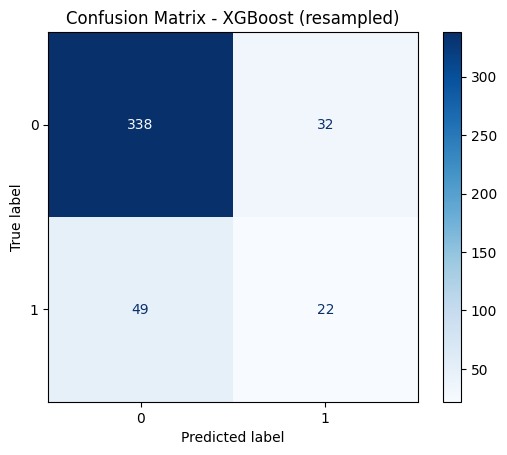

Độ chính xác của mô hình: 0.8163


In [39]:
# Huấn luyện mô hình XGBoost với dữ liệu đã qua resample
model_xgb = XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42)
model_xgb.fit(X_resampled_train, y_resampled_train)
y_pred_xgb = model_xgb.predict(X_test)

print("Báo cáo phân loại:")
print(classification_report(y_test, y_pred_xgb))
# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_xgb), display_labels=[0,1])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - XGBoost (resampled)')
plt.show()
print(f"Độ chính xác của mô hình: {accuracy_score(y_test, y_pred_xgb):.4f}")

[LightGBM] [Info] Number of positive: 863, number of negative: 863
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000344 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1136
[LightGBM] [Info] Number of data points in the train set: 1726, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Báo cáo phân loại:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       370
           1       0.45      0.34      0.39        71

    accuracy                           0.83       441
   macro avg       0.67      0.63      0.64       441
weighted avg       0.81      0.83      0.82       441



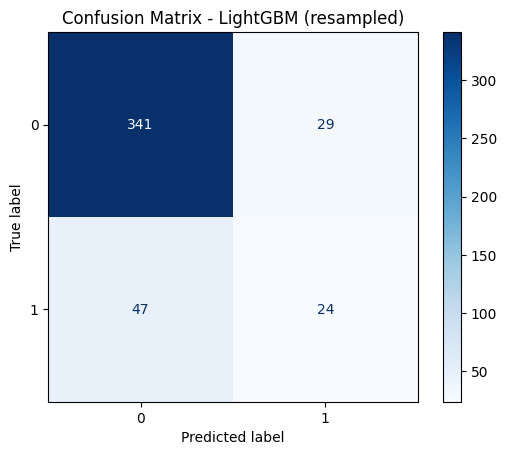

Độ chính xác của mô hình: 0.8277


In [41]:
# Huấn luyện mô hình LightGBM với dữ liệu đã qua resample
model_lgb = lgb.LGBMClassifier(random_state=42)
model_lgb.fit(X_resampled_train, y_resampled_train)
y_pred_lgb = model_lgb.predict(X_test)
print("Báo cáo phân loại:")
print(classification_report(y_test, y_pred_lgb))
# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_lgb), display_labels=[0,1])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - LightGBM (resampled)')
plt.show()
print(f"Độ chính xác của mô hình: {accuracy_score(y_test, y_pred_lgb):.4f}")

Báo cáo phân loại:
              precision    recall  f1-score   support

           0       0.90      0.47      0.62       370
           1       0.21      0.73      0.33        71

    accuracy                           0.51       441
   macro avg       0.55      0.60      0.47       441
weighted avg       0.79      0.51      0.57       441



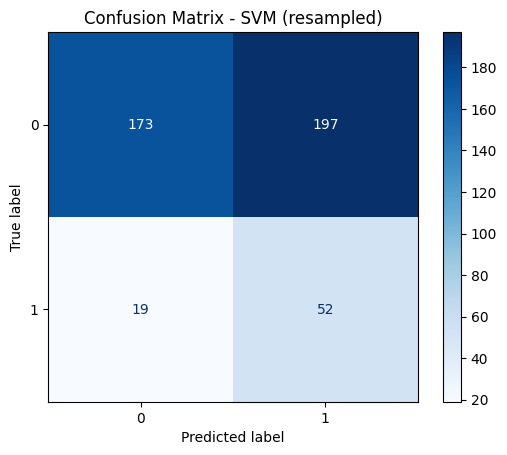

Độ chính xác của mô hình: 0.5102


In [43]:
# Huấn luyện mô hình SVM với dữ liệu đã qua resample
model_svm = SVC(random_state=42)
model_svm.fit(X_resampled_train, y_resampled_train)
y_pred_svm = model_svm.predict(X_test)
print("Báo cáo phân loại:")
print(classification_report(y_test, y_pred_svm))
# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_svm), display_labels=[0,1])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - SVM (resampled)')
plt.show()
print(f"Độ chính xác của mô hình: {accuracy_score(y_test, y_pred_svm):.4f}")

c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.93251 |  0:00:00s
epoch 1  | loss: 0.79156 |  0:00:00s
epoch 2  | loss: 0.72914 |  0:00:00s
epoch 3  | loss: 0.68551 |  0:00:00s
epoch 4  | loss: 0.65903 |  0:00:00s
epoch 5  | loss: 0.63722 |  0:00:00s
epoch 6  | loss: 0.65404 |  0:00:00s
epoch 7  | loss: 0.613   |  0:00:00s
epoch 8  | loss: 0.61314 |  0:00:00s
epoch 9  | loss: 0.59144 |  0:00:00s
epoch 10 | loss: 0.5941  |  0:00:00s
epoch 6  | loss: 0.65404 |  0:00:00s
epoch 7  | loss: 0.613   |  0:00:00s
epoch 8  | loss: 0.61314 |  0:00:00s
epoch 9  | loss: 0.59144 |  0:00:00s
epoch 10 | loss: 0.5941  |  0:00:00s
epoch 11 | loss: 0.56447 |  0:00:00s
epoch 12 | loss: 0.55745 |  0:00:00s
epoch 13 | loss: 0.57089 |  0:00:00s
epoch 14 | loss: 0.57048 |  0:00:00s
epoch 15 | loss: 0.56557 |  0:00:00s
epoch 16 | loss: 0.52915 |  0:00:00s
epoch 11 | loss: 0.56447 |  0:00:00s
epoch 12 | loss: 0.55745 |  0:00:00s
epoch 13 | loss: 0.57089 |  0:00:00s
epoch 14 | loss: 0.57048 |  0:00:00s
epoch 15 | loss: 0.56557 |  0:00:00s
e

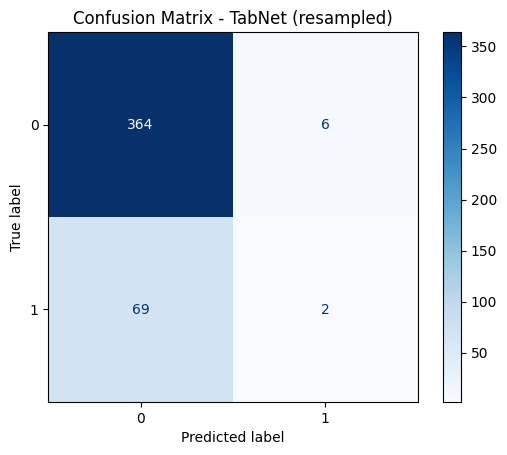

Độ chính xác của mô hình: 0.8299


In [45]:
# Huấn luyện mô hình Tabnet với dữ liệu đã qua resample
model_tabnet = TabNetClassifier(seed=42)
model_tabnet.fit(X_resampled_train.values, y_resampled_train.values, max_epochs=100, patience=10, batch_size=1024, virtual_batch_size=128)
y_pred_tabnet = model_tabnet.predict(X_test.values)
print("Báo cáo phân loại:")
print(classification_report(y_test, y_pred_tabnet))
# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_tabnet), display_labels=[0,1])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - TabNet (resampled)')
plt.show()
print(f"Độ chính xác của mô hình: {accuracy_score(y_test, y_pred_tabnet):.4f}")

Xây dựng mô hình với bộ dữ liệu đã qua resample bằng phương pháp SMOTE và loại bỏ outliers

Báo cáo phân loại:
              precision    recall  f1-score   support

           0       0.88      0.73      0.80       193
           1       0.30      0.54      0.38        41

    accuracy                           0.70       234
   macro avg       0.59      0.63      0.59       234
weighted avg       0.78      0.70      0.73       234



c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


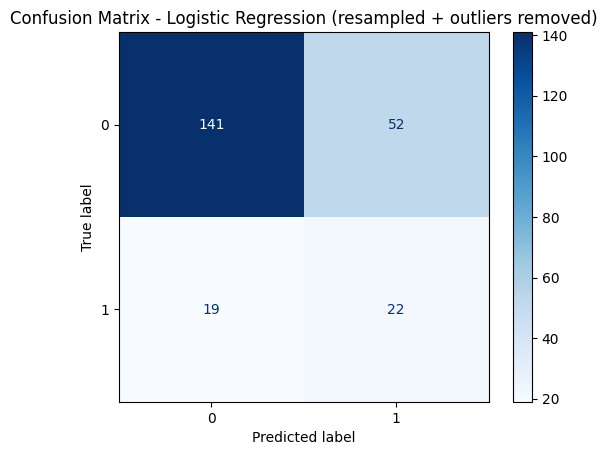

Độ chính xác của mô hình: 0.6966


In [49]:
# Dùng data đã qua resample và loại bỏ outliers để train model
model = LogisticRegression(max_iter=1000)
model.fit(X_resampled_cleaned_outliers_train, y_resampled_cleaned_outliers_train)
y_pred = model.predict(X_cleaned_outliers_test)
print("Báo cáo phân loại:")
print(classification_report(y_cleaned_outliers_test, y_pred))
# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix(y_cleaned_outliers_test, y_pred), display_labels=[0,1])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Logistic Regression (resampled + outliers removed)')
plt.show()
print(f"Độ chính xác của mô hình: {accuracy_score(y_cleaned_outliers_test, y_pred):.4f}")

Báo cáo phân loại:
              precision    recall  f1-score   support

           0       0.87      0.74      0.80       193
           1       0.28      0.49      0.36        41

    accuracy                           0.69       234
   macro avg       0.58      0.61      0.58       234
weighted avg       0.77      0.69      0.72       234



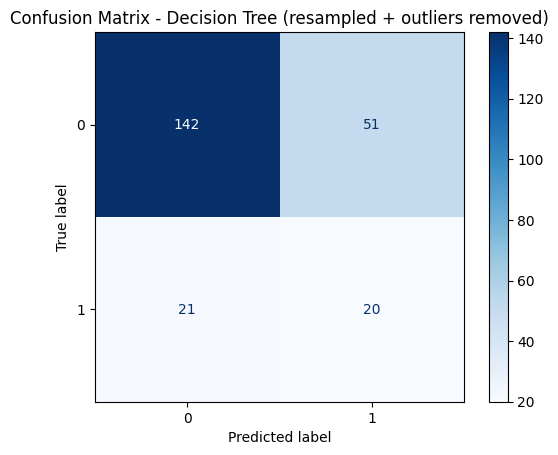

Độ chính xác của mô hình: 0.6923


In [50]:
# Dùng data đã qua resample và clean outliers để train mô hình decision tree
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_resampled_cleaned_outliers_train, y_resampled_cleaned_outliers_train)

y_pred_dt = model_dt.predict(X_cleaned_outliers_test)

print("Báo cáo phân loại:")
print(classification_report(y_cleaned_outliers_test, y_pred_dt))
# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix(y_cleaned_outliers_test, y_pred_dt), display_labels=[0,1])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Decision Tree (resampled + outliers removed)')
plt.show()
print(f"Độ chính xác của mô hình: {accuracy_score(y_cleaned_outliers_test, y_pred_dt):.4f}")

Báo cáo phân loại:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       193
           1       0.39      0.27      0.32        41

    accuracy                           0.80       234
   macro avg       0.62      0.59      0.60       234
weighted avg       0.77      0.80      0.78       234



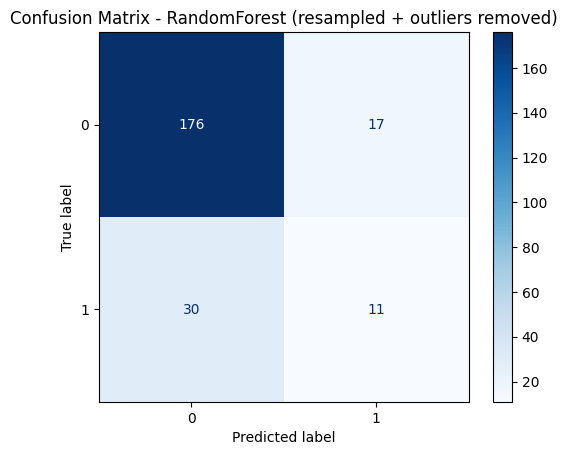

Độ chính xác của mô hình: 0.7991


In [ ]:
# Huấn luyện mô hình RandomForest và đánh giá với dữ liệu đã qua resample và loại bỏ outliers
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_resampled_cleaned_outliers_train, y_resampled_cleaned_outliers_train)
y_pred_rf = model_rf.predict(X_cleaned_outliers_test)
print("Báo cáo phân loại:")
print(classification_report(y_cleaned_outliers_test, y_pred_rf))
# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix(y_cleaned_outliers_test, y_pred_rf), display_labels=[0,1])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - RandomForest (resampled + outliers removed)')
plt.show()
print(f"Độ chính xác của mô hình: {accuracy_score(y_cleaned_outliers_test, y_pred_rf):.4f}")

Giá trị k tốt nhất: 2 với độ chính xác: 0.7393
Báo cáo phân loại:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       193
           1       0.22      0.20      0.21        41

    accuracy                           0.74       234
   macro avg       0.53      0.53      0.53       234
weighted avg       0.73      0.74      0.73       234



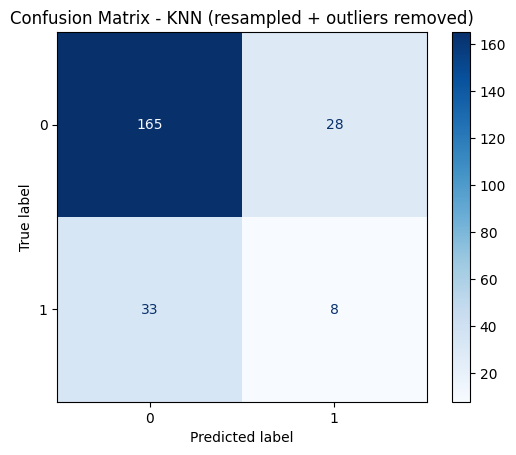

Độ chính xác của mô hình: 0.7393


In [ ]:
# Huan luyện mô hình KNN với dữ liệu đã qua resample và loại bỏ outliers cho K chạy từ 1 đến 30
best_k = 1
best_accuracy = 0
for k in range(1, 31):
    model_knn = KNeighborsClassifier(n_neighbors=k)
    model_knn.fit(X_resampled_cleaned_outliers_train, y_resampled_cleaned_outliers_train)
    y_pred_knn = model_knn.predict(X_cleaned_outliers_test)
    accuracy = accuracy_score(y_cleaned_outliers_test, y_pred_knn)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k
print(f"Giá trị k tốt nhất: {best_k} với độ chính xác: {best_accuracy:.4f}")
model_knn = KNeighborsClassifier(n_neighbors=best_k)   
model_knn.fit(X_resampled_cleaned_outliers_train, y_resampled_cleaned_outliers_train)
y_pred_knn = model_knn.predict(X_cleaned_outliers_test)
print("Báo cáo phân loại:")
print(classification_report(y_cleaned_outliers_test, y_pred_knn))
# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix(y_cleaned_outliers_test, y_pred_knn), display_labels=[0,1])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - KNN (resampled + outliers removed)')
plt.show()
print(f"Độ chính xác của mô hình: {accuracy_score(y_cleaned_outliers_test, y_pred_knn):.4f}")

In [ ]:
# Huấn luyện mô hình XGBoost với dữ liệu đã qua resample và loại bỏ outliers
model_xgb = XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42)
model_xgb.fit(X_resampled_cleaned_outliers_train, y_resampled_cleaned_outliers_train)
y_pred_xgb = model_xgb.predict(X_cleaned_outliers_test)

print("Báo cáo phân loại:")
print(classification_report(y_cleaned_outliers_test, y_pred_xgb))
print("Ma trận nhầm lẫn:")
print(confusion_matrix(y_cleaned_outliers_test, y_pred_xgb))
print(f"Độ chính xác của mô hình: {accuracy_score(y_cleaned_outliers_test, y_pred_xgb):.4f}")

c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:32:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Báo cáo phân loại:
              precision    recall  f1-score   support

           0       0.87      0.90      0.89       193
           1       0.44      0.37      0.40        41

    accuracy                           0.81       234
   macro avg       0.66      0.63      0.64       234
weighted avg       0.79      0.81      0.80       234

Ma trận nhầm lẫn:
[[174  19]
 [ 26  15]]
Độ chính xác của mô hình: 0.8077


In [ ]:
# Huấn luyện mô hình LightGBM với dữ liệu đã qua resample và loại bỏ outliers
model_lgb = lgb.LGBMClassifier(random_state=42)
model_lgb.fit(X_resampled_cleaned_outliers_train, y_resampled_cleaned_outliers_train)
y_pred_lgb = model_lgb.predict(X_cleaned_outliers_test)
print("Báo cáo phân loại:") 
print(classification_report(y_cleaned_outliers_test, y_pred_lgb))
print("Ma trận nhầm lẫn:")
print(confusion_matrix(y_cleaned_outliers_test, y_pred_lgb))
print(f"Độ chính xác của mô hình: {accuracy_score(y_cleaned_outliers_test, y_pred_lgb):.4f}")

[LightGBM] [Info] Number of positive: 448, number of negative: 448
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000464 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1076
[LightGBM] [Info] Number of data points in the train set: 896, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Báo cáo phân loại:
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       193
           1       0.43      0.37      0.39        41

    accuracy                           0.80       234
   macro avg       0.65      0.63      0.64       234
weighted avg       0.79      0.80      0.80       234

Ma trận nhầm lẫn:
[[173  20]
 [ 26  15]]
Độ chính xác của mô hình: 0.8034


In [ ]:
# Huấn luyện mô hình SVM với dữ liệu đã qua resample và loại bỏ outliers
model_svm = SVC(random_state=42)
model_svm.fit(X_resampled_cleaned_outliers_train, y_resampled_cleaned_outliers_train)
y_pred_svm = model_svm.predict(X_cleaned_outliers_test)
print("Báo cáo phân loại:")
print(classification_report(y_cleaned_outliers_test, y_pred_svm))
print("Ma trận nhầm lẫn:")
print(confusion_matrix(y_cleaned_outliers_test, y_pred_svm))
print(f"Độ chính xác của mô hình: {accuracy_score(y_cleaned_outliers_test, y_pred_svm):.4f}")

Báo cáo phân loại:
              precision    recall  f1-score   support

           0       0.87      0.47      0.61       193
           1       0.21      0.66      0.32        41

    accuracy                           0.50       234
   macro avg       0.54      0.56      0.46       234
weighted avg       0.75      0.50      0.56       234

Ma trận nhầm lẫn:
[[ 90 103]
 [ 14  27]]
Độ chính xác của mô hình: 0.5000


c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.93251 |  0:00:00s
epoch 1  | loss: 0.79156 |  0:00:00s
epoch 2  | loss: 0.72914 |  0:00:00s
epoch 3  | loss: 0.68551 |  0:00:00s
epoch 4  | loss: 0.65903 |  0:00:00s
epoch 5  | loss: 0.63722 |  0:00:00s
epoch 6  | loss: 0.65404 |  0:00:00s
epoch 7  | loss: 0.613   |  0:00:00s
epoch 8  | loss: 0.61314 |  0:00:00s
epoch 9  | loss: 0.59144 |  0:00:00s
epoch 10 | loss: 0.5941  |  0:00:00s
epoch 11 | loss: 0.56447 |  0:00:00s
epoch 12 | loss: 0.55745 |  0:00:00s
epoch 13 | loss: 0.57089 |  0:00:00s
epoch 14 | loss: 0.57048 |  0:00:01s
epoch 15 | loss: 0.56557 |  0:00:01s
epoch 16 | loss: 0.52915 |  0:00:01s
epoch 17 | loss: 0.51061 |  0:00:01s
epoch 18 | loss: 0.52593 |  0:00:01s
epoch 19 | loss: 0.5183  |  0:00:01s
epoch 20 | loss: 0.51408 |  0:00:01s
epoch 21 | loss: 0.51552 |  0:00:01s
epoch 22 | loss: 0.48392 |  0:00:01s
epoch 23 | loss: 0.51635 |  0:00:01s
epoch 24 | loss: 0.49482 |  0:00:01s
epoch 25 | loss: 0.47545 |  0:00:01s
epoch 26 | loss: 0.52542 |  0:00:01s
e

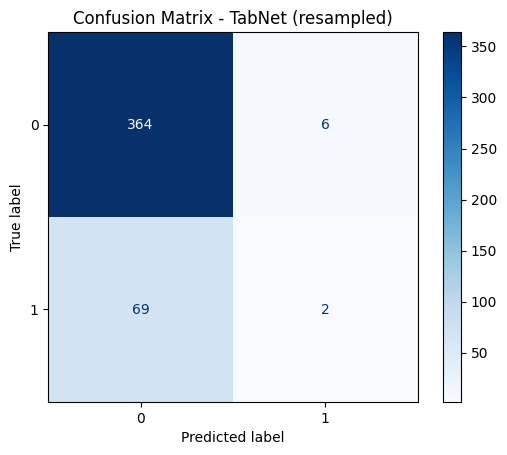

Độ chính xác của mô hình: 0.8299


In [ ]:
# Huấn luyện mô hình Tabnet với dữ liệu đã qua resample
model_tabnet = TabNetClassifier(seed=42)
model_tabnet.fit(X_resampled_train.values, y_resampled_train.values, max_epochs=100, patience=10, batch_size=1024, virtual_batch_size=128)
y_pred_tabnet = model_tabnet.predict(X_test.values)
print("Báo cáo phân loại:")
print(classification_report(y_test, y_pred_tabnet))
# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_tabnet), display_labels=[0,1])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - TabNet (resampled)')
plt.show()
print(f"Độ chính xác của mô hình: {accuracy_score(y_test, y_pred_tabnet):.4f}")

In [ ]:
# Dùng tensorflow để xây dựng mô hình ANN (Artificial Neural Network)
model_ann = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_top_12_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_ann.fit(X_top_12_train, y_top_12_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)
y_pred_ann = (model_ann.predict(X_top_12_test) > 0.5).astype("int32")
print("Báo cáo phân loại:")
print(classification_report(y_top_12_test, y_pred_ann))
print("Ma trận nhầm lẫn:")
print(confusion_matrix(y_top_12_test, y_pred_ann))
print(f"Độ chính xác của mô hình: {accuracy_score(y_top_12_test, y_pred_ann):.4f}")


c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7582 - loss: 49.0677 - val_accuracy: 0.8058 - val_loss: 11.4079
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7327 - loss: 23.7150 - val_accuracy: 0.8058 - val_loss: 16.5101
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7752 - loss: 16.1407 - val_accuracy: 0.7961 - val_loss: 9.5482
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7655 - loss: 12.3240 - val_accuracy: 0.8010 - val_loss: 7.3163
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7448 - loss: 9.9951 - val_accuracy: 0.7961 - val_loss: 3.7513
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7667 - loss: 7.8536 - val_accuracy: 0.7961 - val_loss: 4.5231
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7521 - loss: 7.2457 - val_accuracy: 0.7961 - val_loss: 3.1217
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7606 - loss: 6.1723 - val_accuracy: 0.7476 - va

c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [73]:
# Dùng tensorflow để xây dựng mô hình ANN (Artificial Neural Network)
model_ann = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_resampled_top12_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_ann.fit(X_resampled_top12_train, y_resampled_top_12_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

y_pred_ann = (model_ann.predict(X_top_12_test) > 0.5).astype("int32")
print("Báo cáo phân loại:")
print(classification_report(y_top_12_test, y_pred_ann))
print("Ma trận nhầm lẫn:")
print(confusion_matrix(y_top_12_test, y_pred_ann))
print(f"Độ chính xác của mô hình: {accuracy_score(y_top_12_test, y_pred_ann):.4f}")


c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5522 - loss: 51.6883 - val_accuracy: 0.0954 - val_loss: 36.0420
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5507 - loss: 28.0720 - val_accuracy: 0.0145 - val_loss: 17.9691
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5565 - loss: 16.3517 - val_accuracy: 0.1821 - val_loss: 1.8338
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5645 - loss: 11.1190 - val_accuracy: 0.1185 - val_loss: 4.7157
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5572 - loss: 8.3999 - val_accuracy: 0.2572 - val_loss: 1.6274
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5768 - loss: 6.1418 - val_accuracy: 0.1069 - val_loss: 2.9416
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5312 - loss: 3.9979 - val_accuracy: 0.0000e+00 - val_loss: 4.4923
Epoch 8/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5377 - loss: 3.3838 - val_accuracy: 0.0318 -

# Tinh chỉnh các mô hình


In [71]:

# Tinh chỉnh mô hình sử dụng GridSearchCV cho Random Forest và Logistic Regression
# GridSearch cho Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_resampled_train, y_resampled_train)
print(f"Best parameters for Random Forest: {grid_rf.best_params_}")
print(f"Best accuracy for Random Forest: {grid_rf.best_score_:.4f}")

# GridSearch cho Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear']
}
grid_lr = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)
grid_lr.fit(X_resampled_train, y_resampled_train)
print(f"Best parameters for Logistic Regression: {grid_lr.best_params_}")
print(f"Best accuracy for Logistic Regression: {grid_lr.best_score_:.4f}")

# Đánh giá lại trên tập kiểm tra
best_rf = grid_rf.best_estimator_
best_lr = grid_lr.best_estimator_

y_pred_rf_best = best_rf.predict(X_test)
y_pred_lr_best = best_lr.predict(X_test)

print("\nRandom Forest sau tinh chỉnh:")
print(classification_report(y_test, y_pred_rf_best))
print(f"Độ chính xác: {accuracy_score(y_test, y_pred_rf_best):.4f}")

print("\nLogistic Regression sau tinh chỉnh:")
print(classification_report(y_test, y_pred_lr_best))
print(f"Độ chính xác: {accuracy_score(y_test, y_pred_lr_best):.4f}")

Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best accuracy for Random Forest: 0.9190
Best parameters for Logistic Regression: {'C': 10, 'solver': 'liblinear'}
Best accuracy for Logistic Regression: 0.8315

Random Forest sau tinh chỉnh:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       370
           1       0.37      0.27      0.31        71

    accuracy                           0.81       441
   macro avg       0.62      0.59      0.60       441
weighted avg       0.79      0.81      0.79       441

Độ chính xác: 0.8073

Logistic Regression sau tinh chỉnh:
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       370
           1       0.40      0.49      0.44        71

    accuracy                           0.80       441
   macro avg       0.65      0.67      0.66       441
weighted avg       0.82      0.80      0.81       44

Lưu lại các mô hình đã qua huấn luyện và các dataset qua các giai đoạn tiền xử lý khác nhau

In [ ]:
# Lưu mô hình đã huấn luyện sử dụng joblib
joblib.dump(best_rf, 'best_random_forest_model.pkl')
joblib.dump(best_lr, 'best_logistic_regression_model.pkl')
joblib.dump(model_knn, 'best_knn_model.pkl')
joblib.dump(model_dt, 'best_decision_tree_model.pkl')
joblib.dump(model_tabnet, 'best_tabnet_model.pkl')
joblib.dump(model_xgb, 'best_xgboost_model.pkl')
joblib.dump(model_lgb, 'best_lightgbm_model.pkl')
joblib.dump(model_svm, 'best_svm_model.pkl')
# Load mô hình và dự đoán lại để kiểm tra
loaded_rf = joblib.load('best_random_forest_model.pkl')
loaded_lr = joblib.load('best_logistic_regression_model.pkl')
loaded_knn = joblib.load('best_knn_model.pkl')
loaded_dt = joblib.load('best_decision_tree_model.pkl')
loaded_tabnet = joblib.load('best_tabnet_model.pkl')
loaded_xgb = joblib.load('best_xgboost_model.pkl')
loaded_lgb = joblib.load('best_lightgbm_model.pkl')
loaded_svm = joblib.load('best_svm_model.pkl')


NameError: name 'df_resampled' is not defined